In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180410

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
fontsize = 40

import os
import importlib
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import interp1d
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize
from codeStore import support_fun as spf
from src import slenderBodyTheory as slb
from tqdm.notebook import tqdm as tqdm_notebook

PWD = os.getcwd()
np.set_printoptions(linewidth=130, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [4]:
importlib.reload(slb)
ph = 1
rt1 = 1
rt2 = 0.08
ch_list = 10 ** np.linspace(0, 3, 100)
epsabs = 1e-100
epsrel = 1e-10
ifprint = False
sij_fun = slb.sij_2hlx_fun

At_list = []
Bt_list = []
Ct_list = []
ftr_list = []
frt_list = []
Cij_list = []
for chi in tqdm_notebook(ch_list):
    tAt, tBt, tCt, tftr, tfrt, tCij = \
        slb.asymtotic_AtBtCtCij_lighthill(ph, rt1, rt2, chi, sij_fun=sij_fun, epsabs=epsabs, epsrel=epsrel, 
                                          ifprint=ifprint, use_doublets=True)
    At_list.append(tAt)
    Bt_list.append(tBt)
    Ct_list.append(tCt)
    Cij_list.append(tCij)
    ftr_list.append(tftr)
    frt_list.append(tfrt)
At = np.hstack(At_list)
Bt = np.hstack(Bt_list)
Ct = np.hstack(Ct_list)
Cij = np.dstack(Cij_list)
uz = Bt / (At * Ct)
data_asymtotic = [At, Bt, Ct, Cij, ftr_list, frt_list, uz]

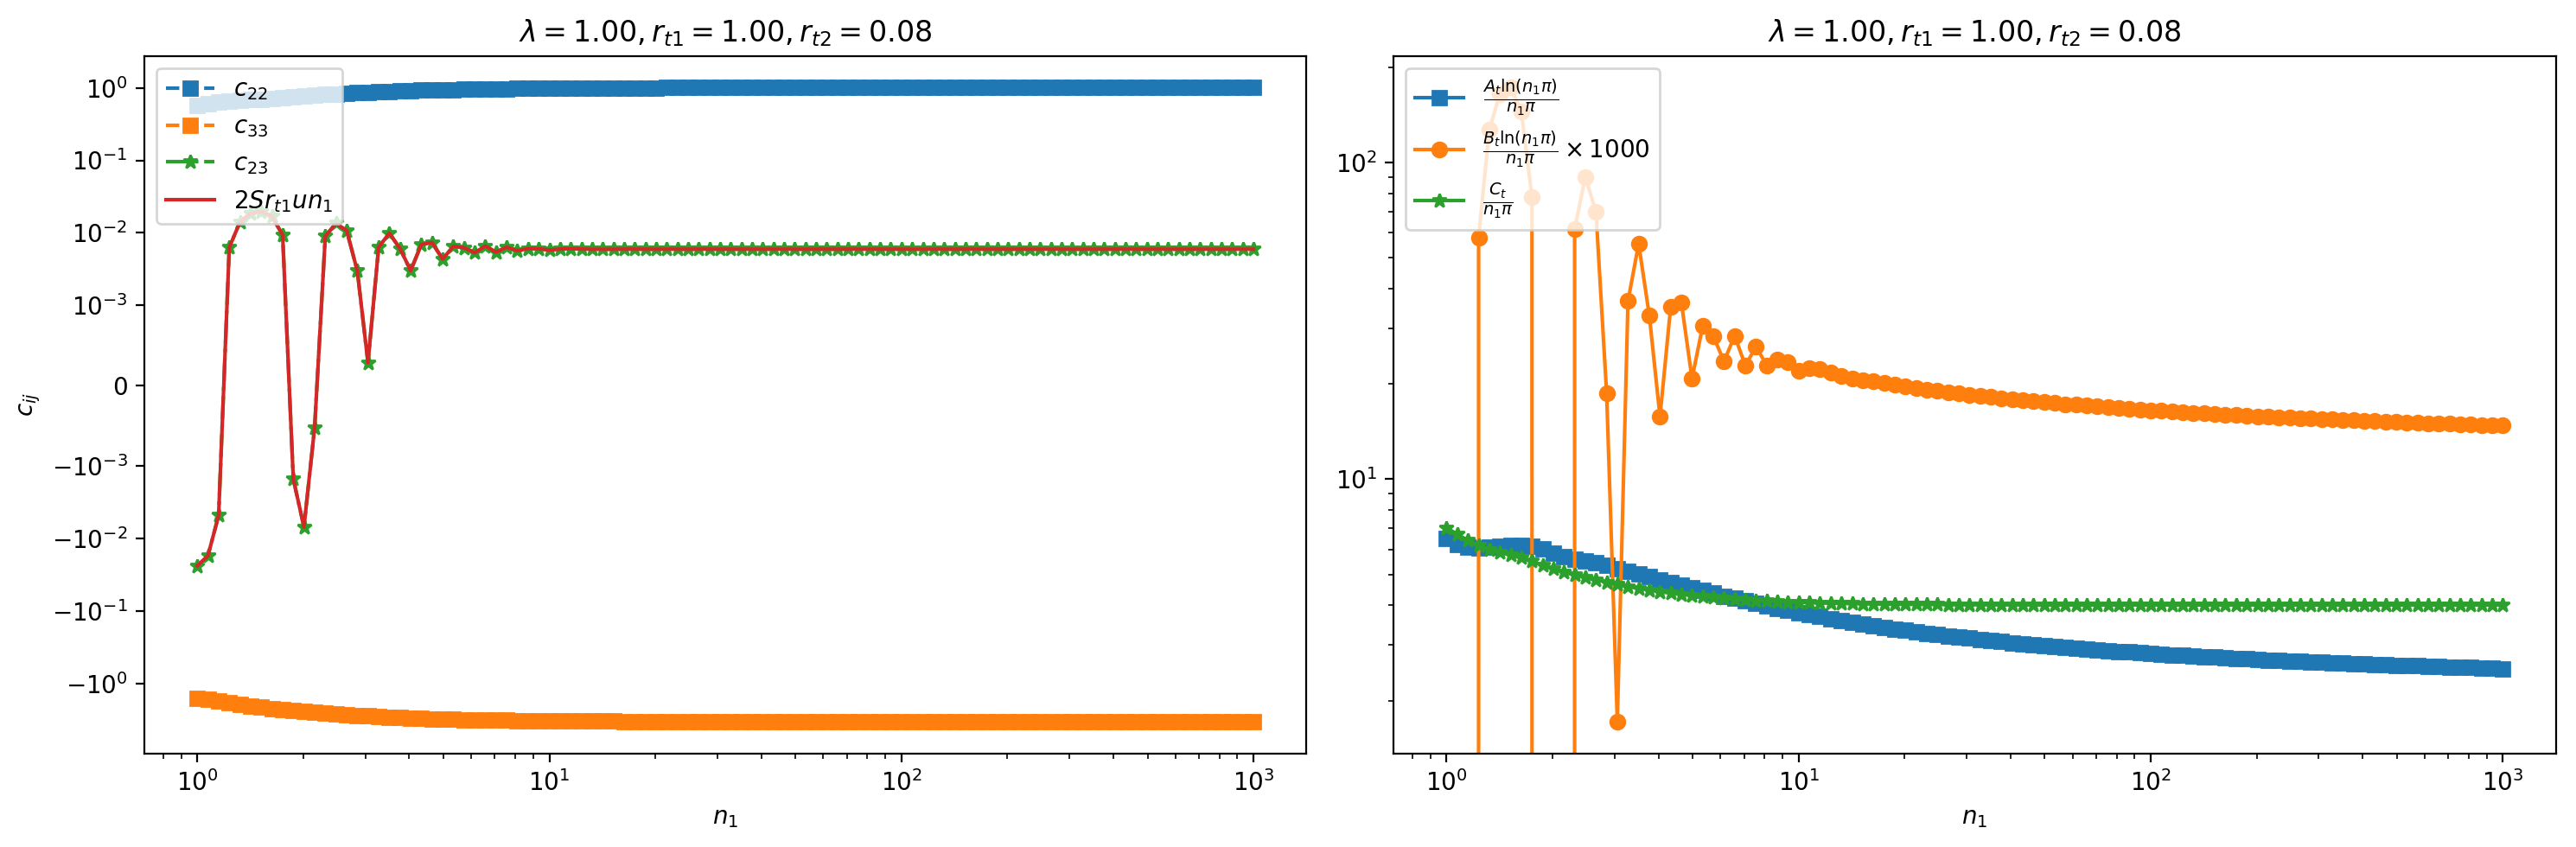

In [5]:
ij_list = ((1, 1), (2, 2), (1, 2))
linestyle_list = ['--s', '--s', '-.*'] 
markevery = 1
# markevery = ch_list.size // 13
dpi = 200
figsize=(15, 5)

S = np.sqrt(4 * np.pi ** 2 * rt1 ** 2 + ph ** 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')
# Cij
ax = axs[0]
for (ti, tj), linestyle in zip(ij_list, linestyle_list):
    ax.plot(ch_list, Cij[ti, tj, :], linestyle, label='$c_{%1d%1d}$' % (ti + 1, tj + 1), markevery=markevery)
ax.plot(ch_list, 2 * S * rt1 * uz * ch_list, '-', label='$2 S r_{t1} u n_1$', markevery=markevery)
ax.set_xscale('log')
ax.set_yscale('symlog', linthreshy=1e-3)
ax.set_xlabel('$n_1$')
ax.set_ylabel('$c_{ij}$')
ax.set_title('$\\lambda=%.2f, r_{t1}=%.2f, r_{t2}=%.2f$' % (ph, rt1, rt2))
# ax.legend(ncol=1, loc='upper left')
ax.legend(loc='upper left')

# At, Bt, Ct
ax = axs[1]
th_list = np.pi * np.array(ch_list)
ax.plot(ch_list, At * np.log(th_list) / th_list, '-s', label='$\\frac{A_t \\ln (n_1 \\pi)}{n_1 \\pi}$', markevery=markevery)
ax.plot(ch_list, Bt * np.log(th_list) / th_list * 1000, '-o', label='$\\frac{B_t \\ln (n_1 \\pi)}{n_1 \\pi} \\times 1000$', markevery=markevery)
ax.plot(ch_list, Ct / th_list, '-*', label='$\\frac{C_t}{n_1 \\pi}$', markevery=markevery)
ax.set_xlabel('$n_1$')
# ax.plot(np.log(th_list), th_list / At, '-s', label='$\\frac{n_1 \\pi}{A_t}$', markevery=markevery)
# ax.plot(np.log(th_list), th_list / Bt, '-s', label='$\\frac{n_1 \\pi}{B_t}$', markevery=markevery)
# ax.plot(np.log(ch_list), np.log(Ct), '-*', label='$\\ln C_t$', markevery=markevery)
# ax.set_xlabel('$\ln n_1$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim((0, 250))
# ax.set_ylabel('$c_{ij}$')
ax.set_title('$\\lambda=%.2f, r_{t1}=%.2f, r_{t2}=%.2f$' % (ph, rt1, rt2))
# ax.legend(ncol=1, loc='upper left')
ax.legend(loc='upper left')
plt.tight_layout()

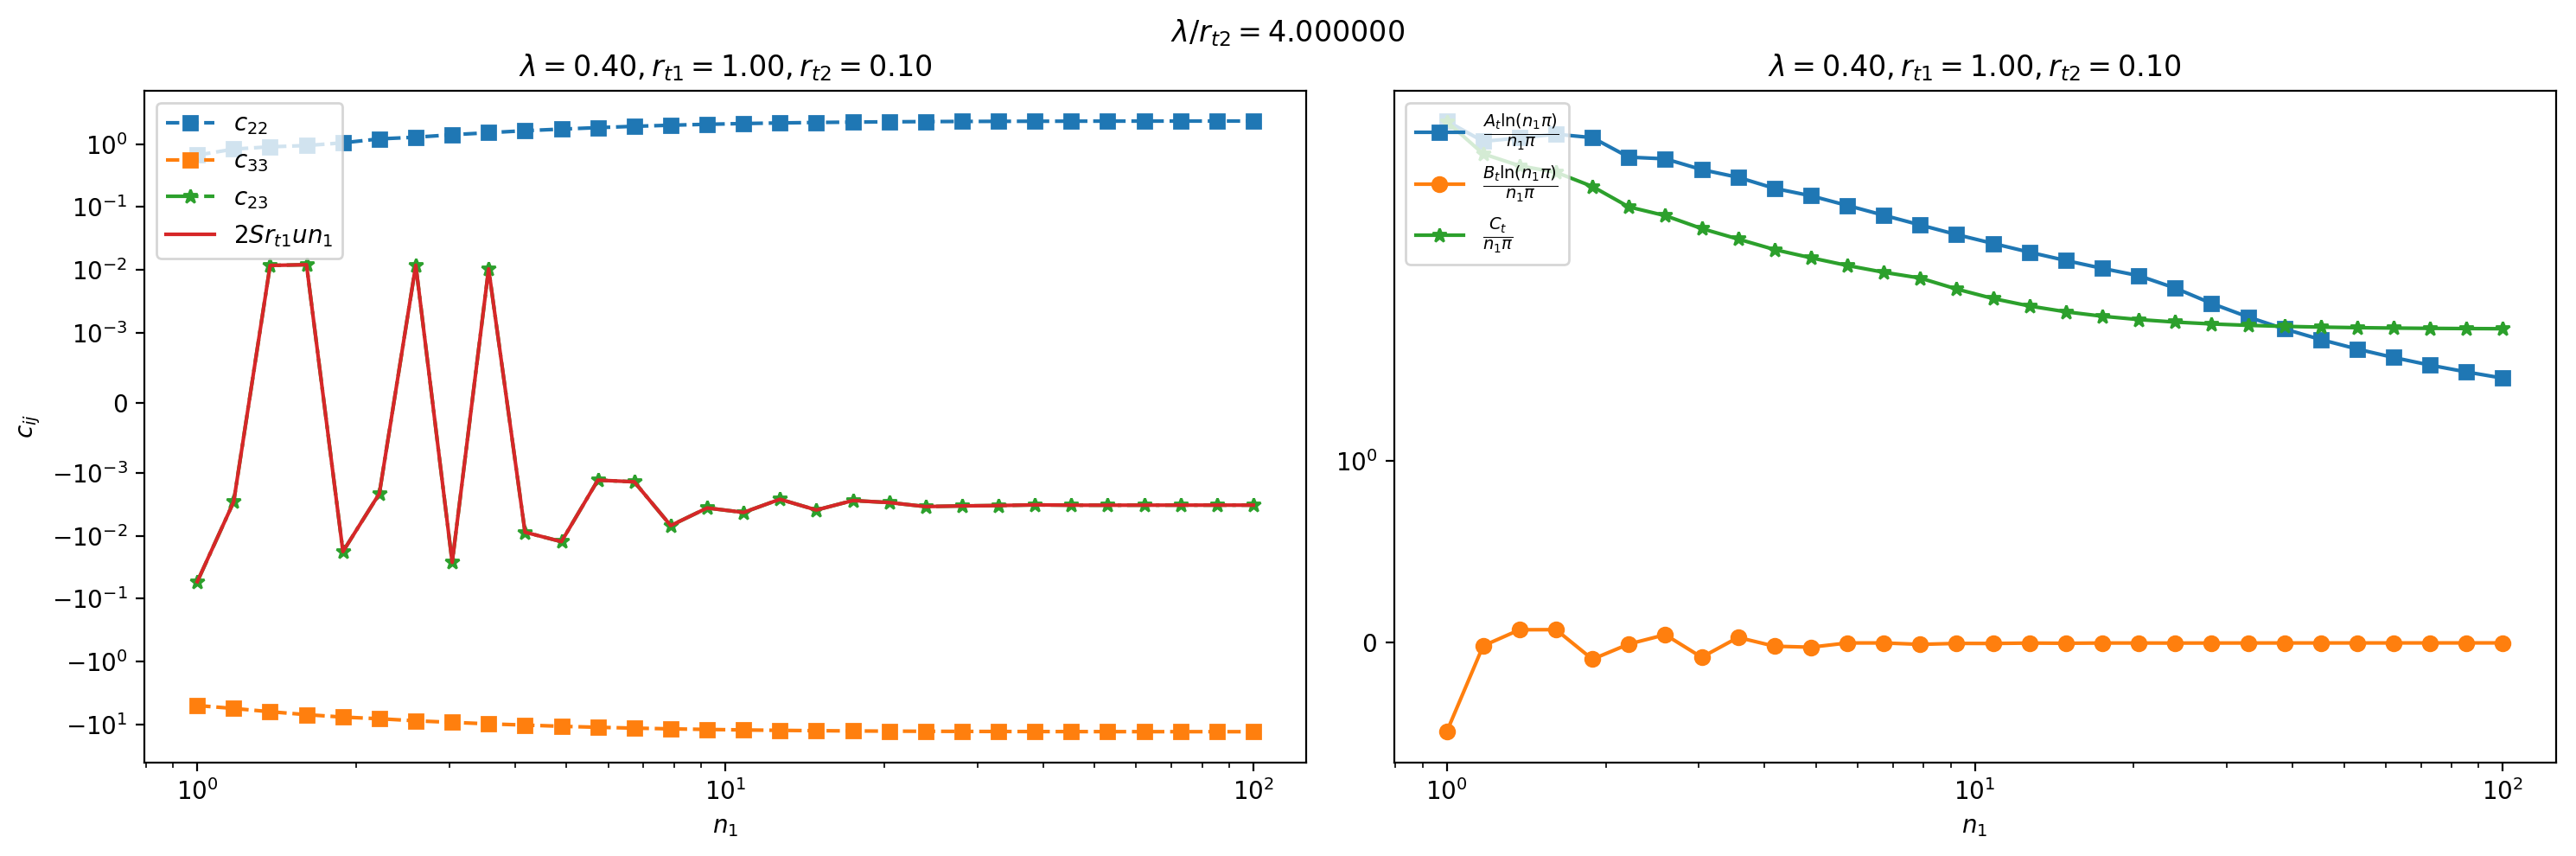

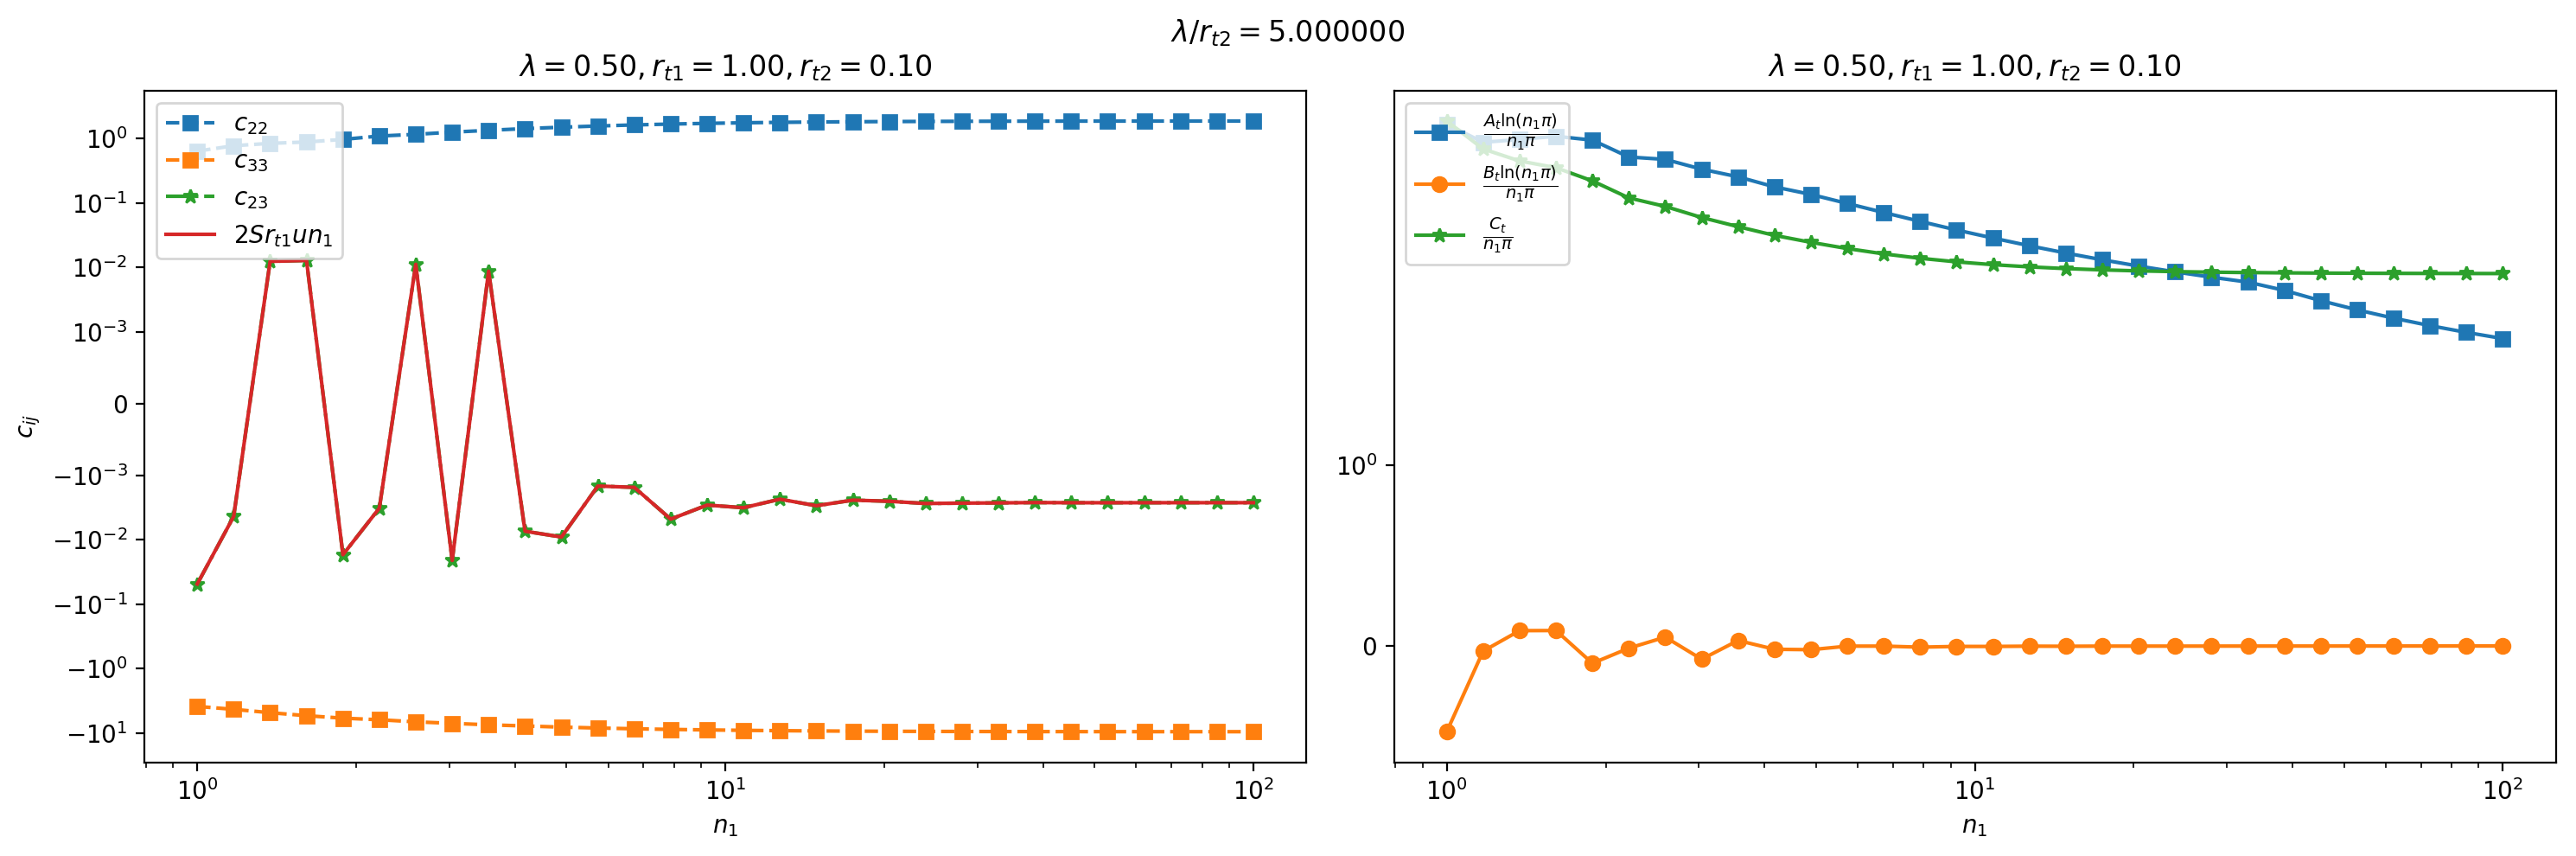

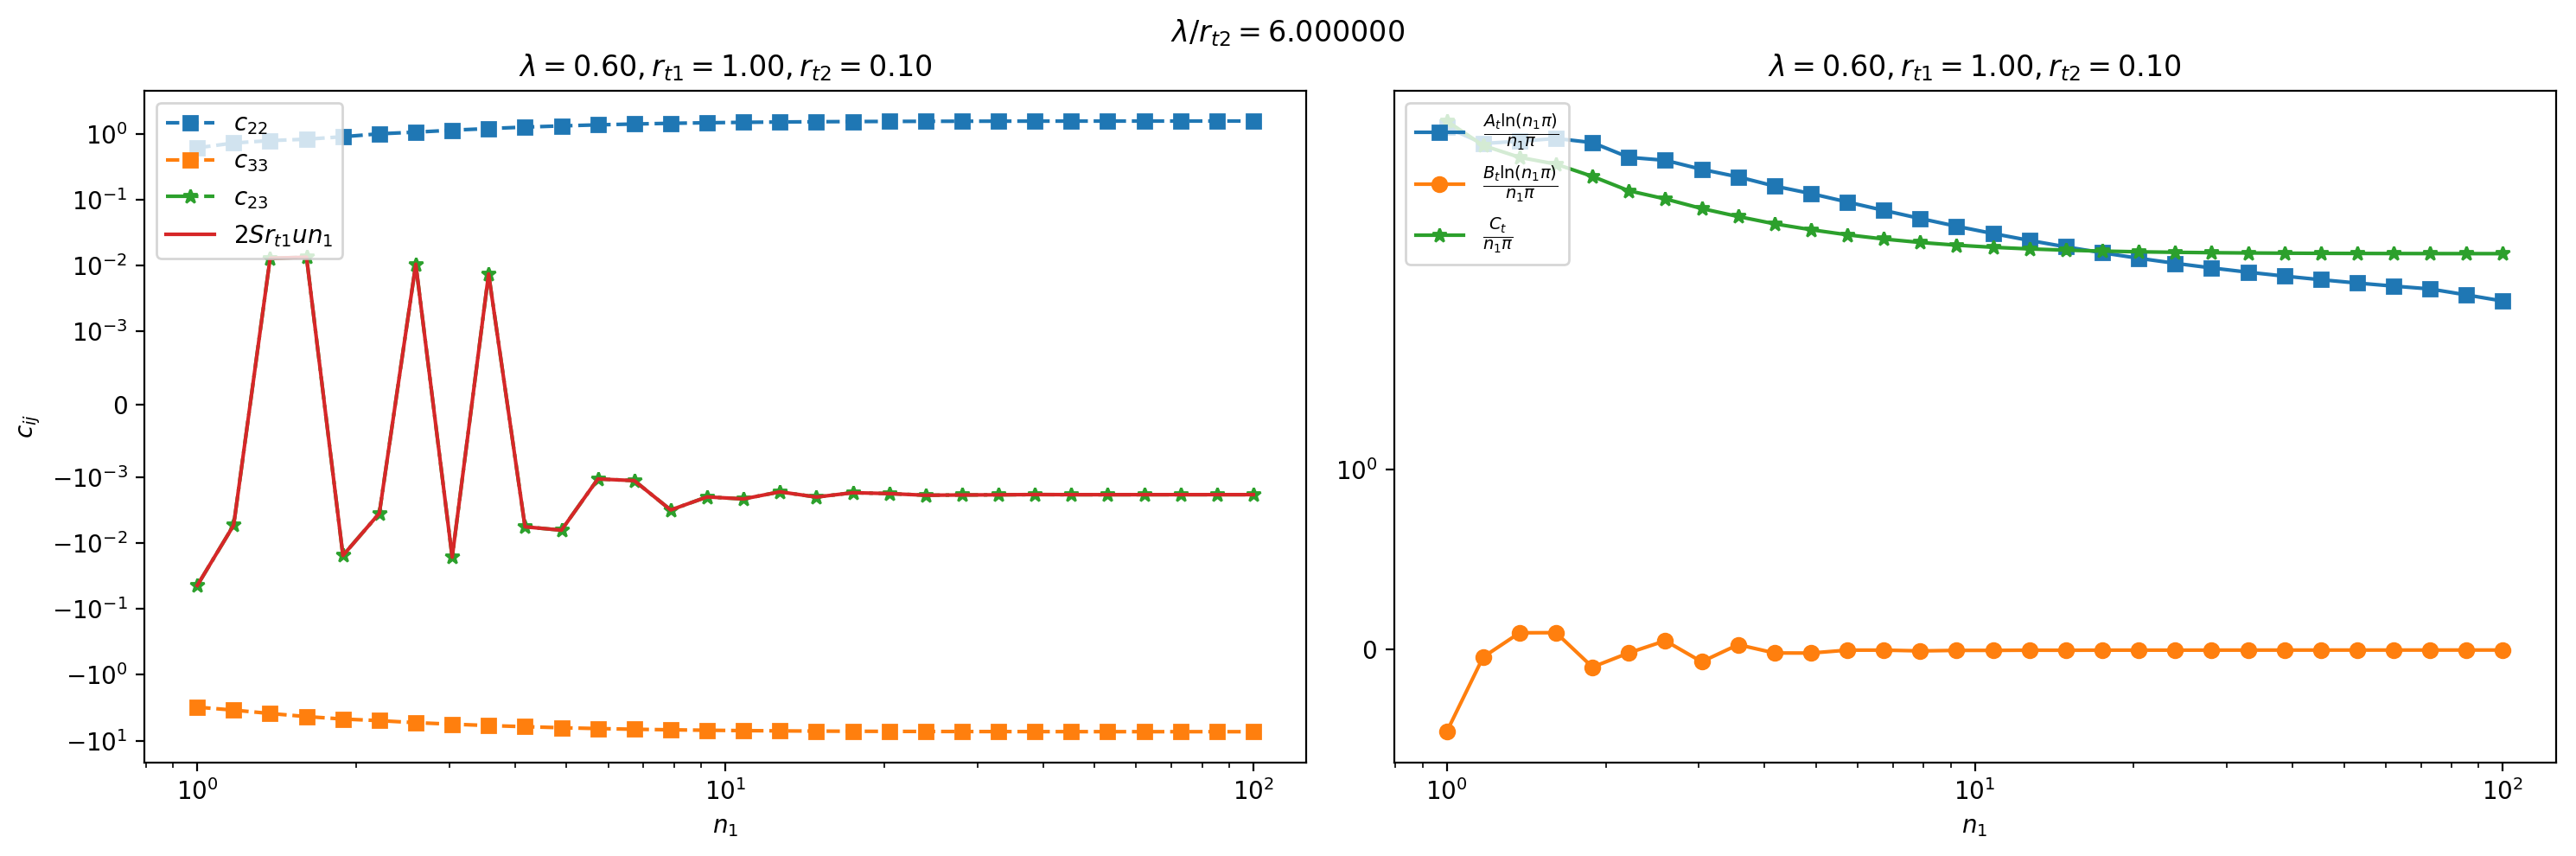

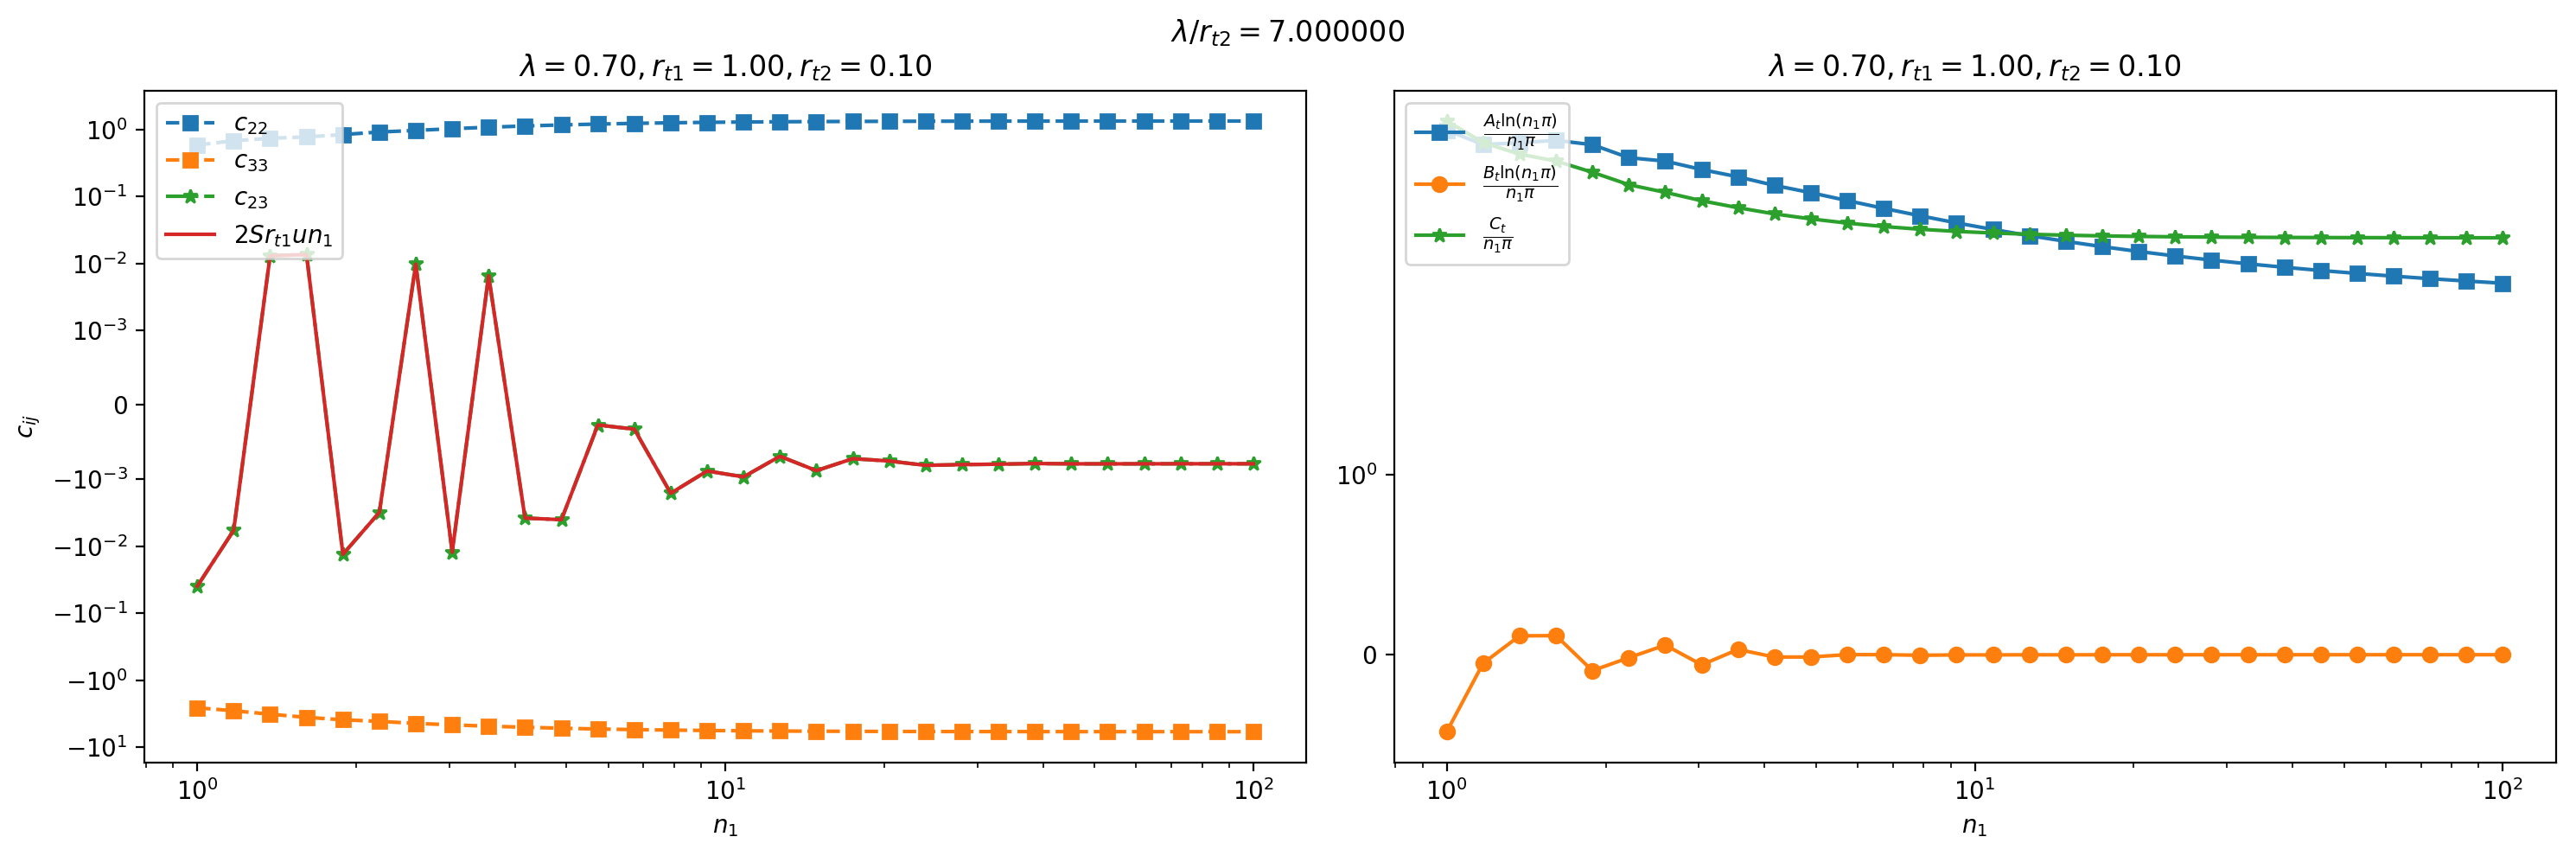

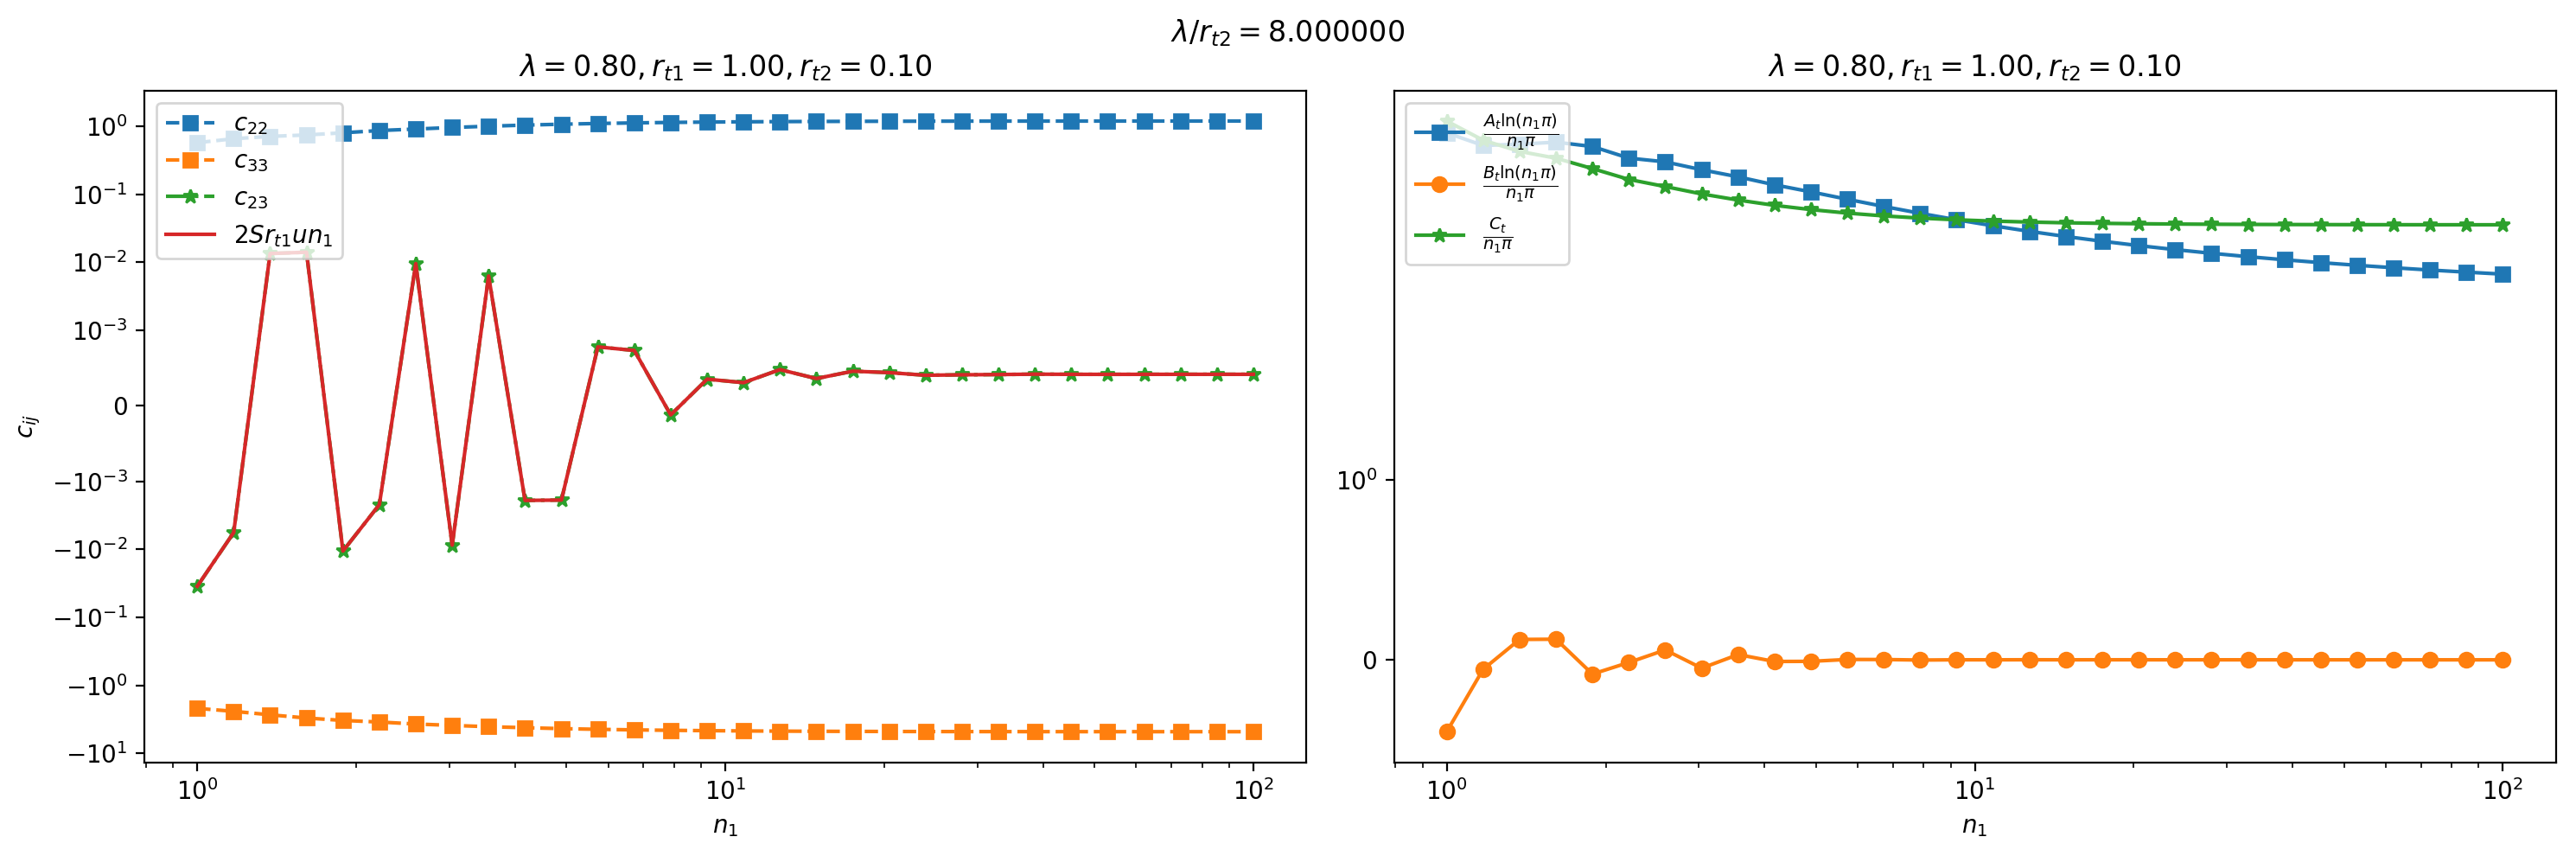

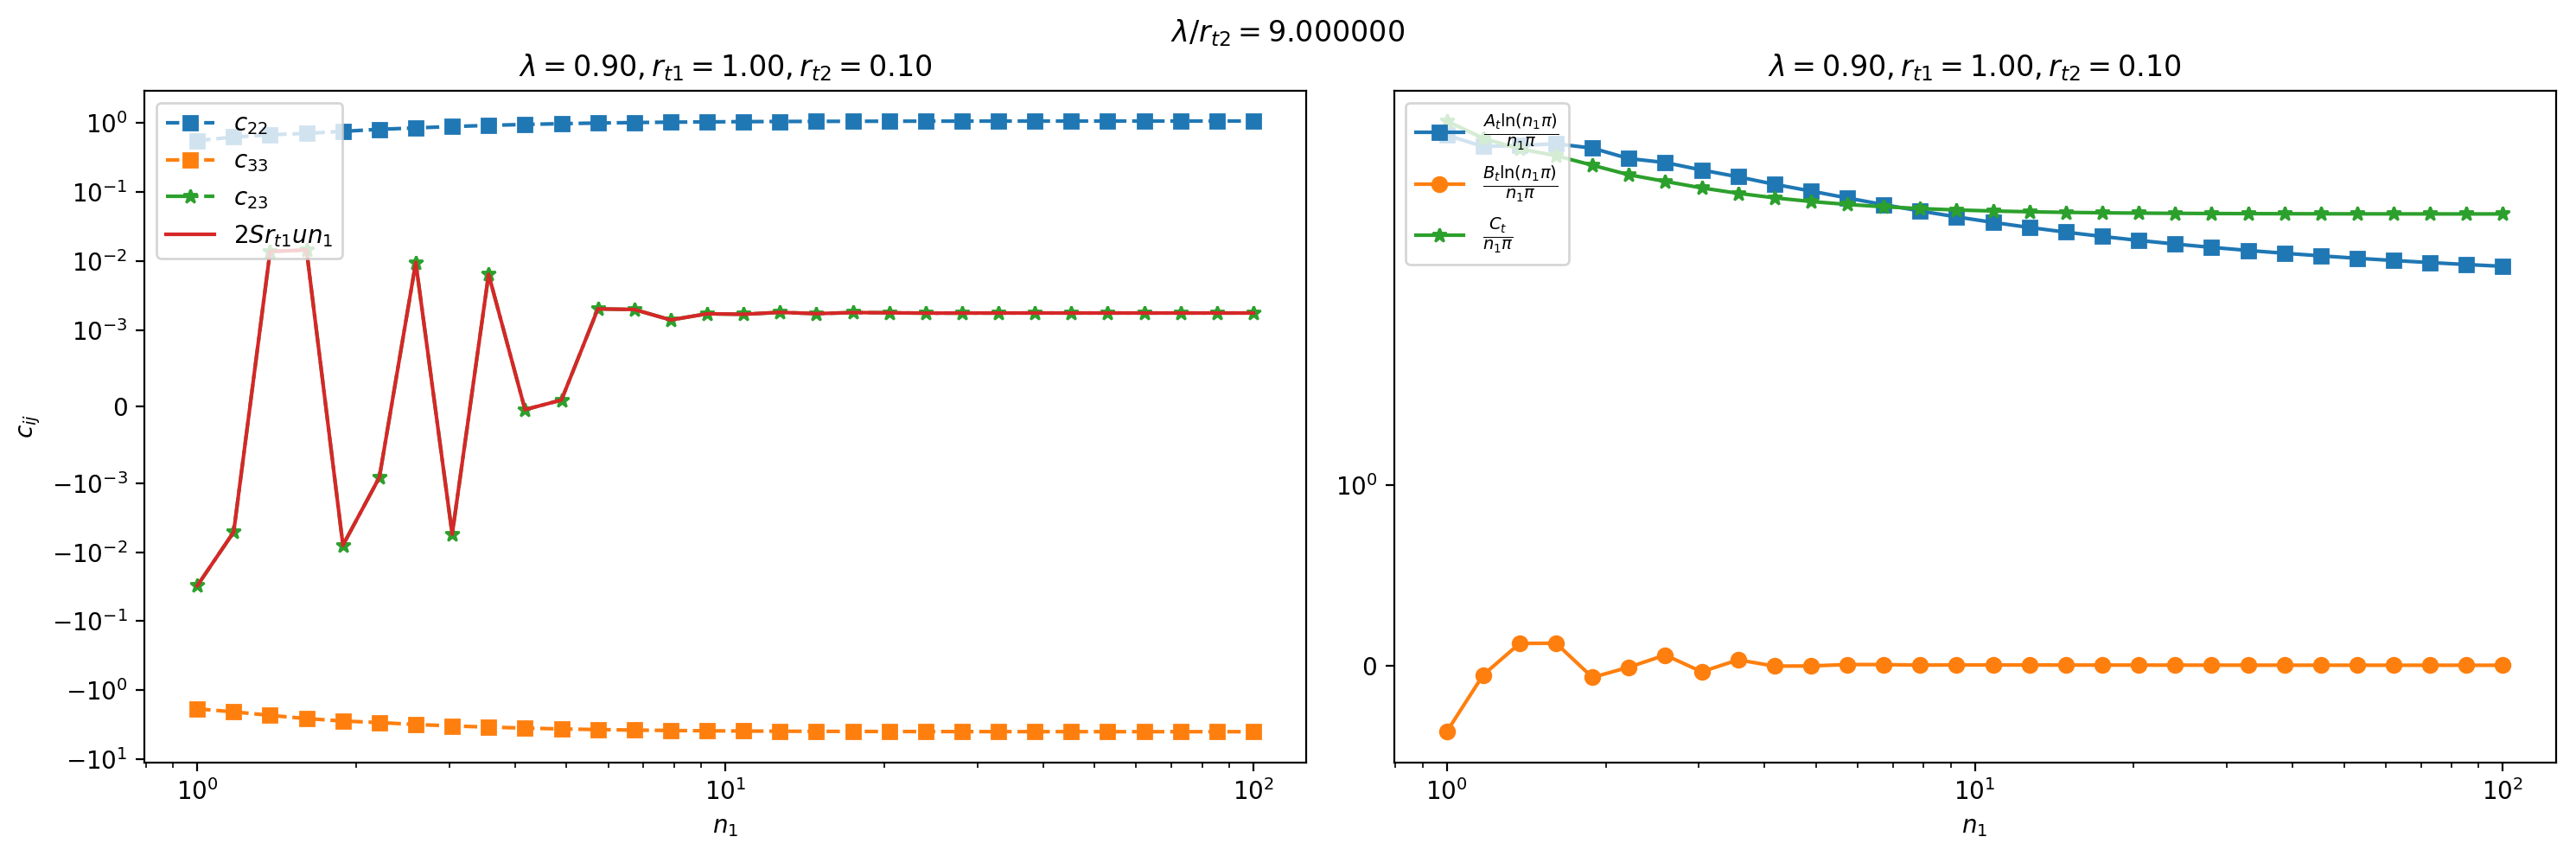

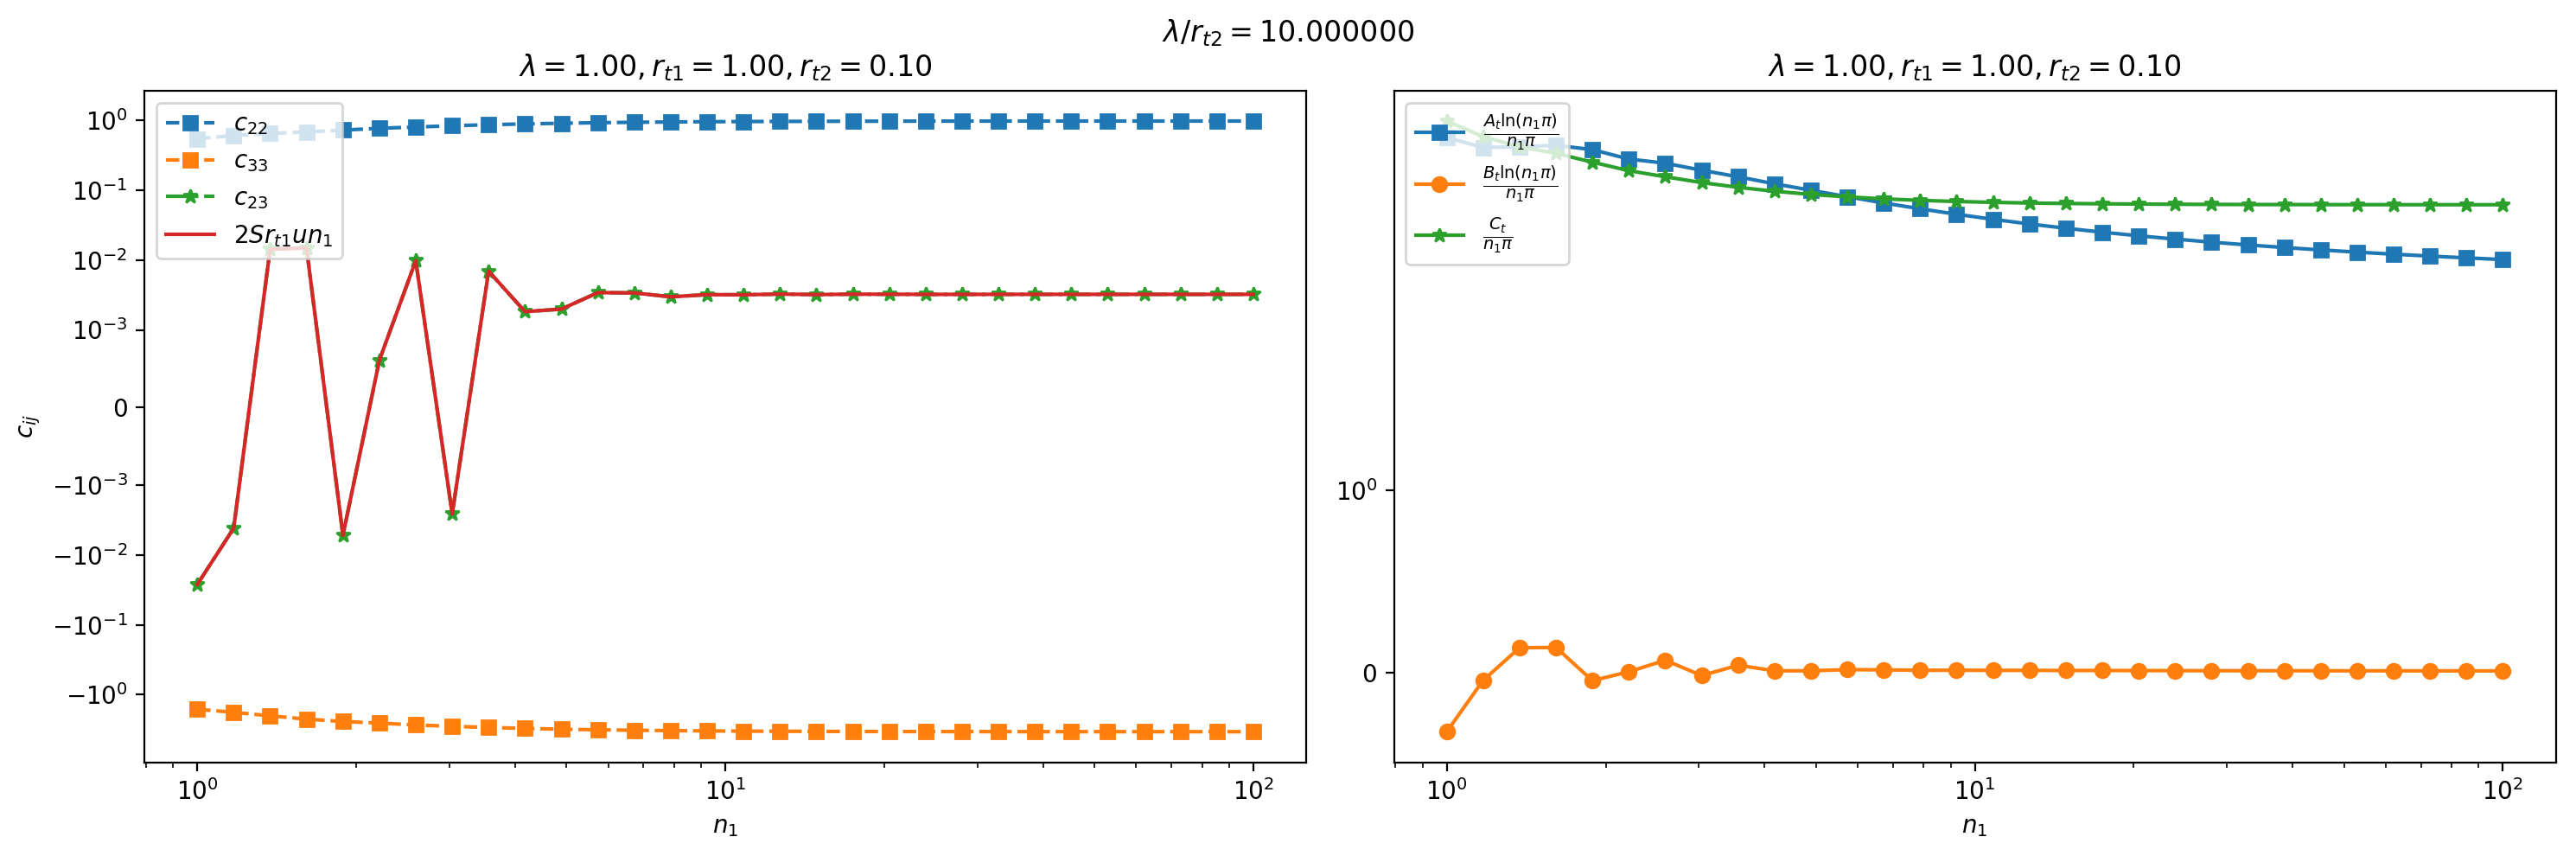

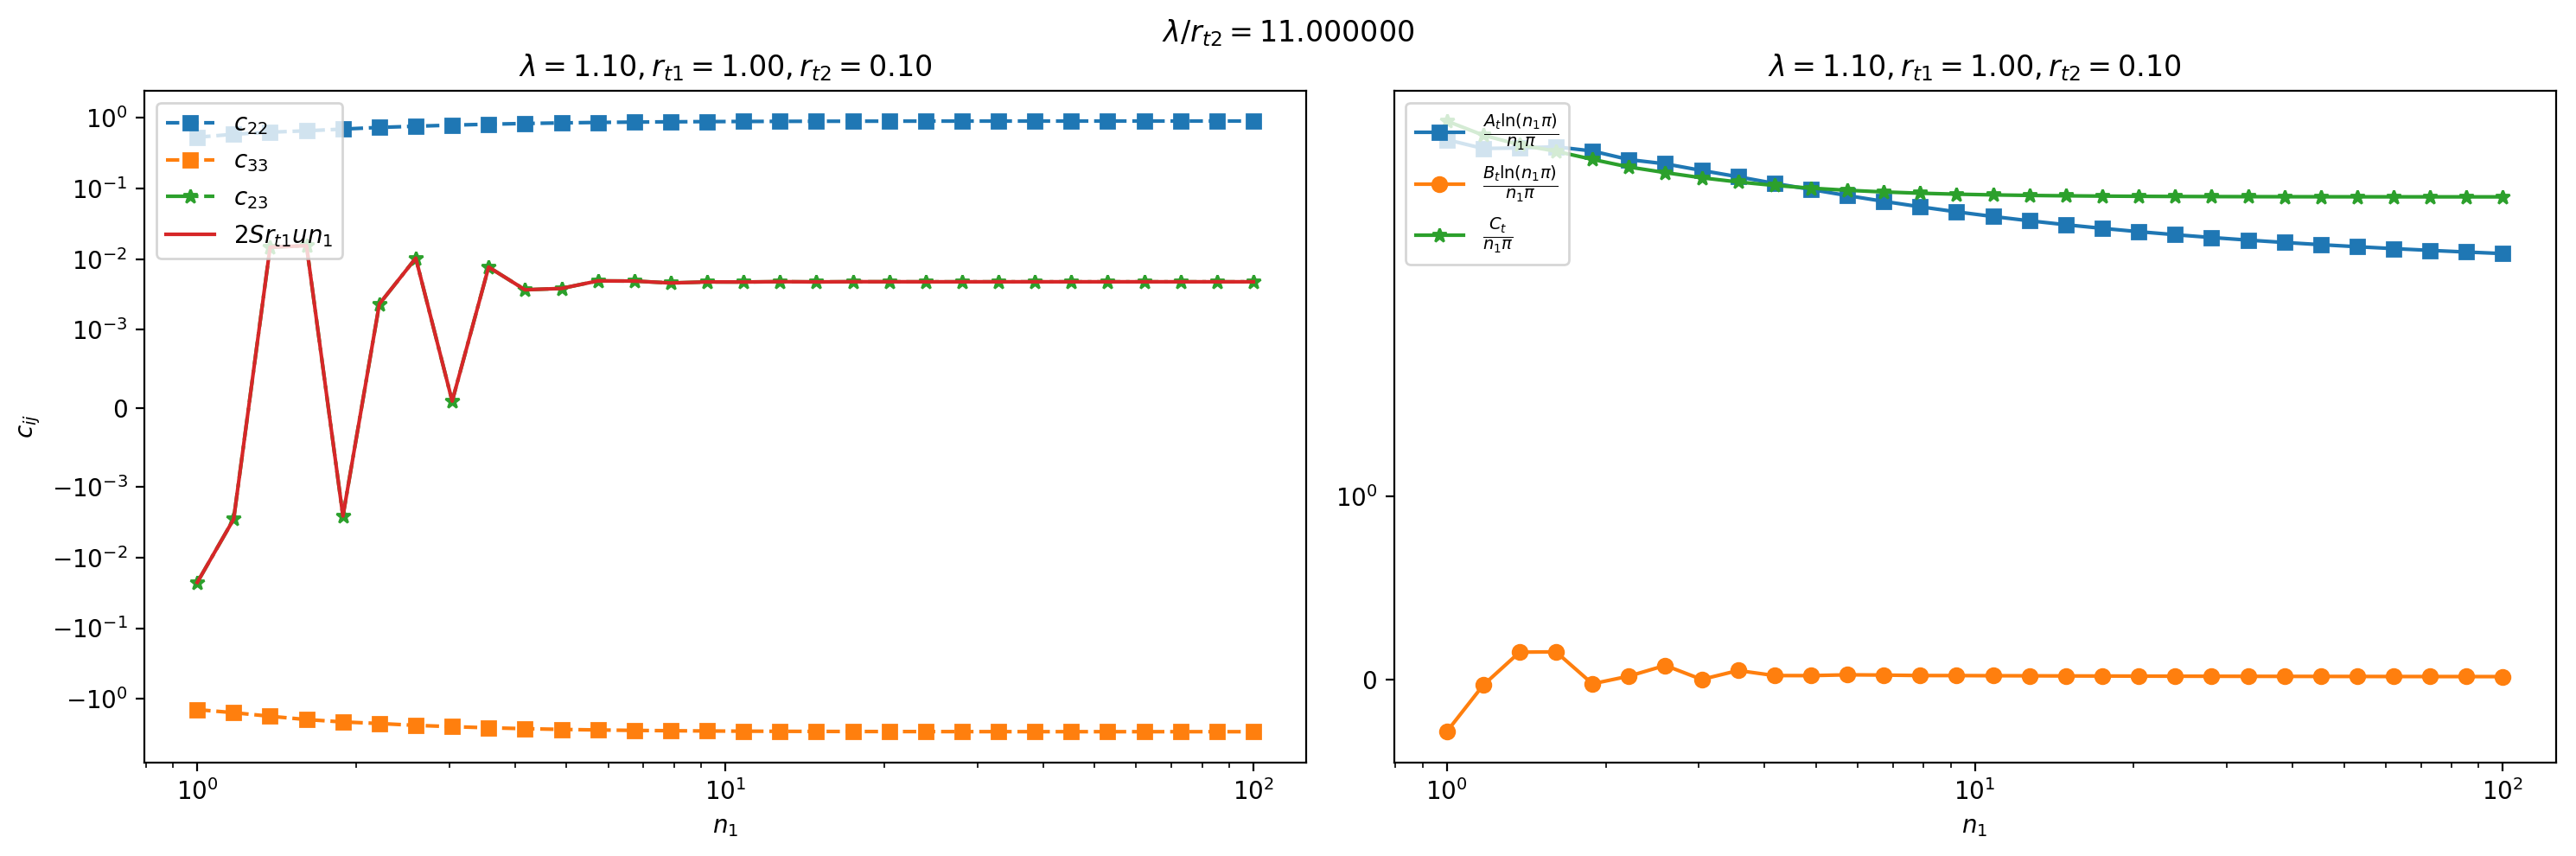

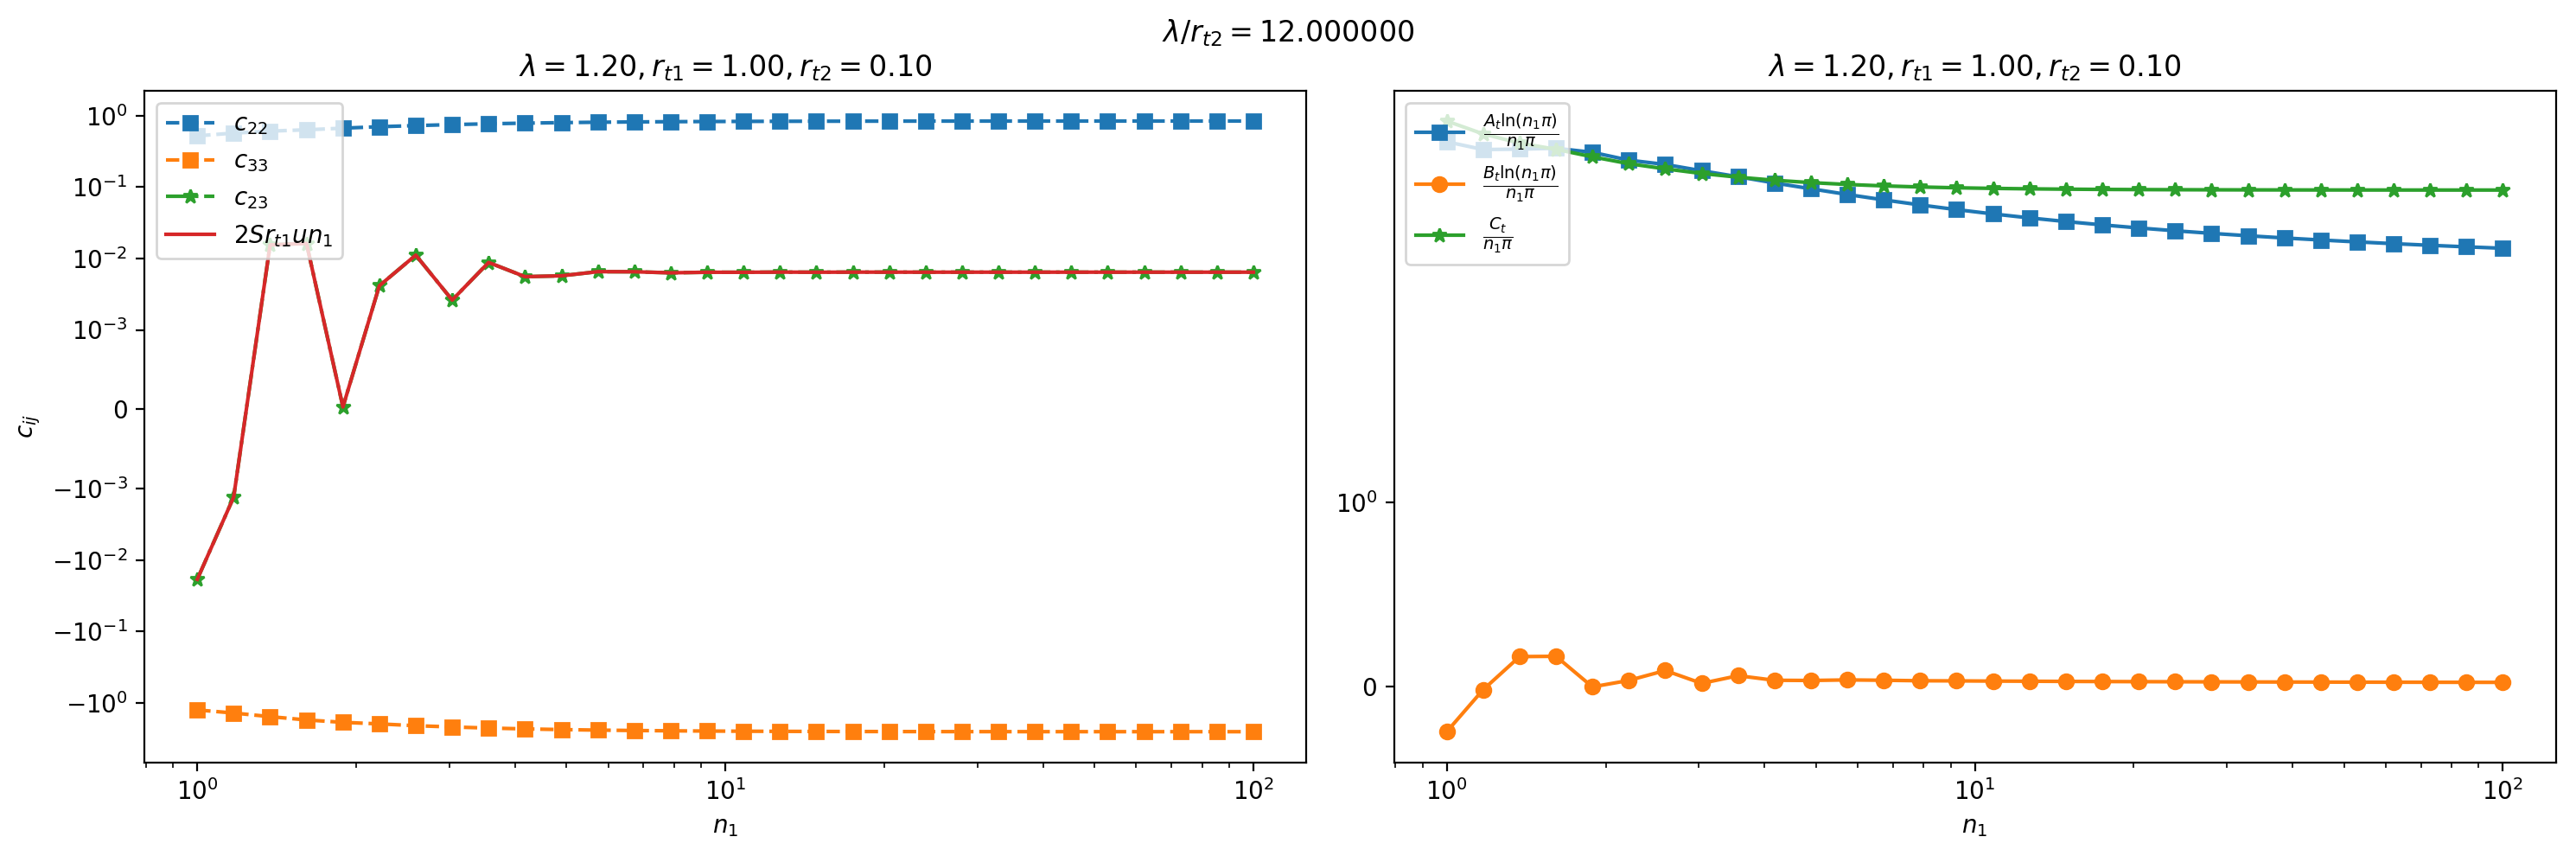

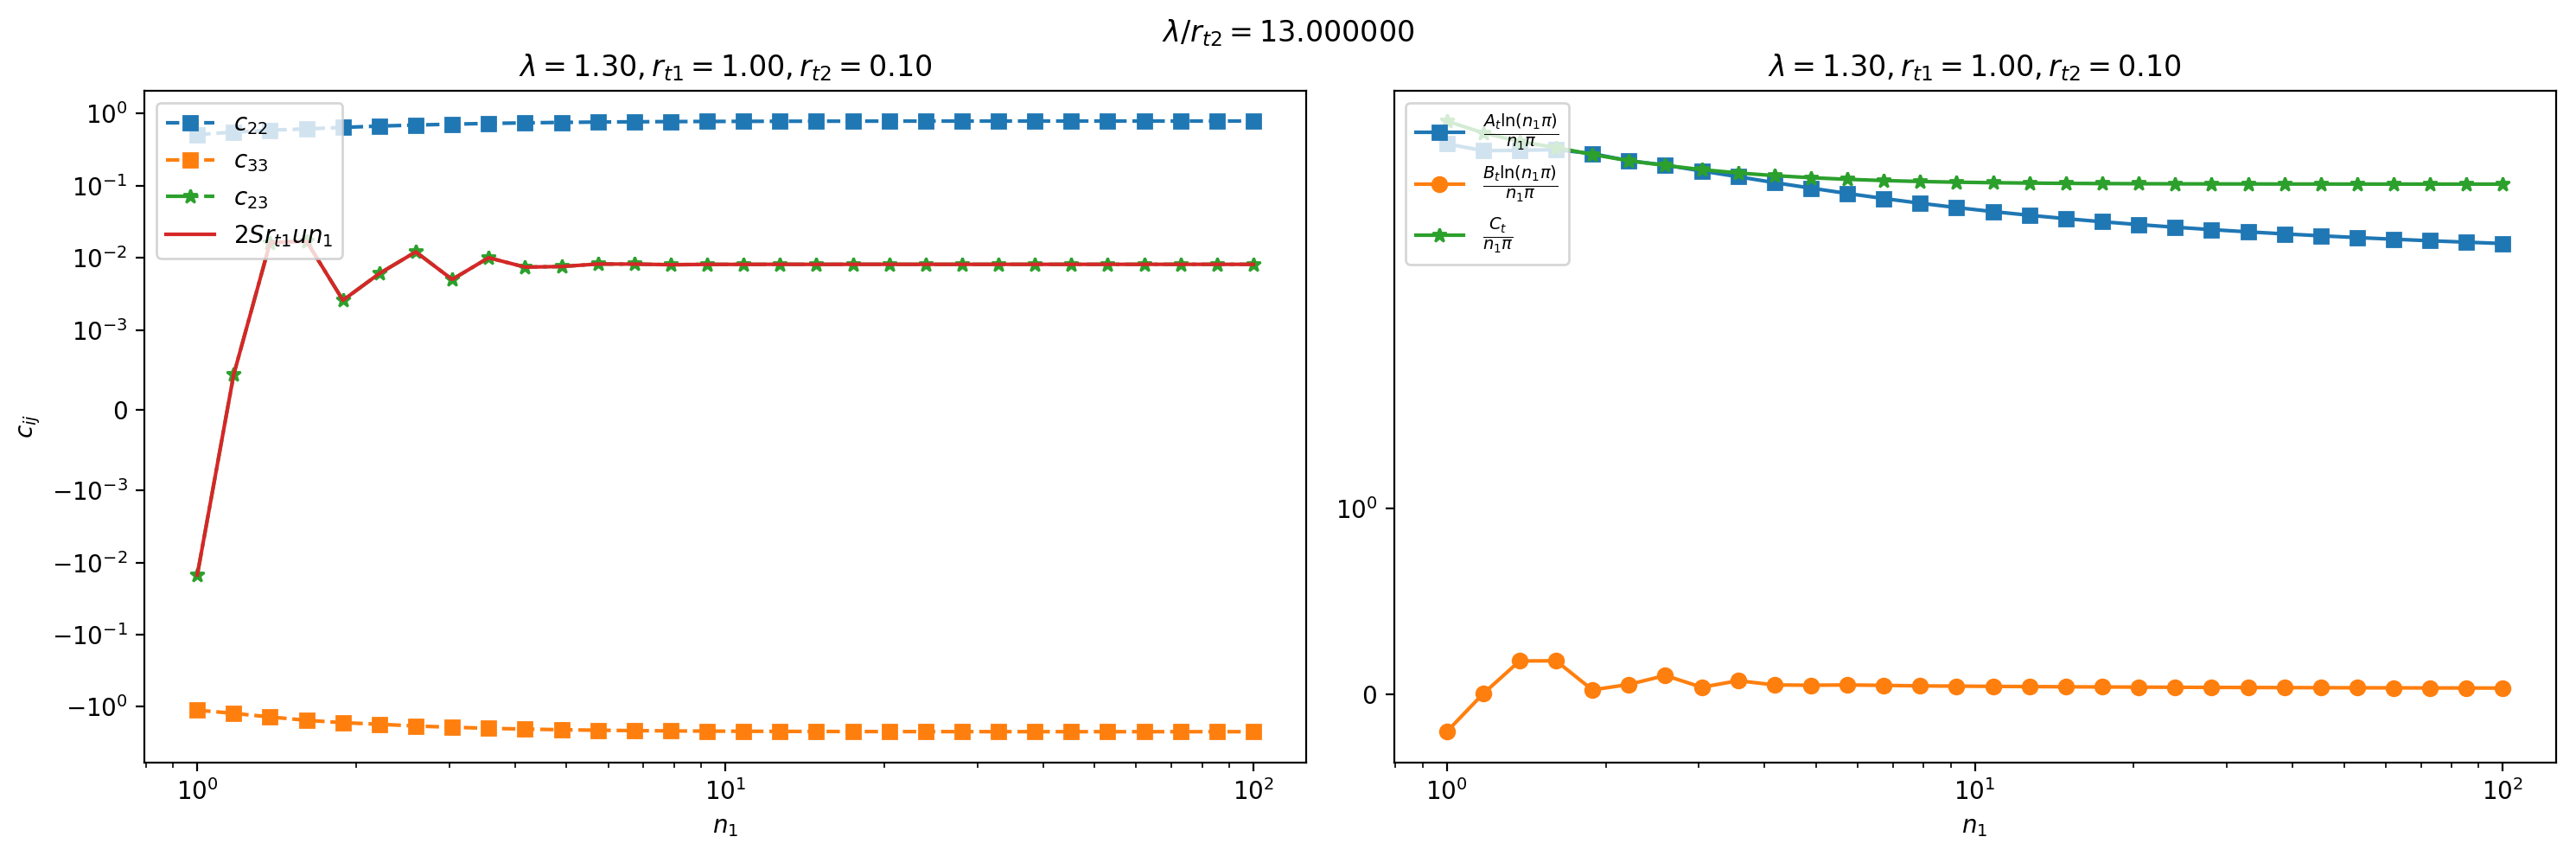

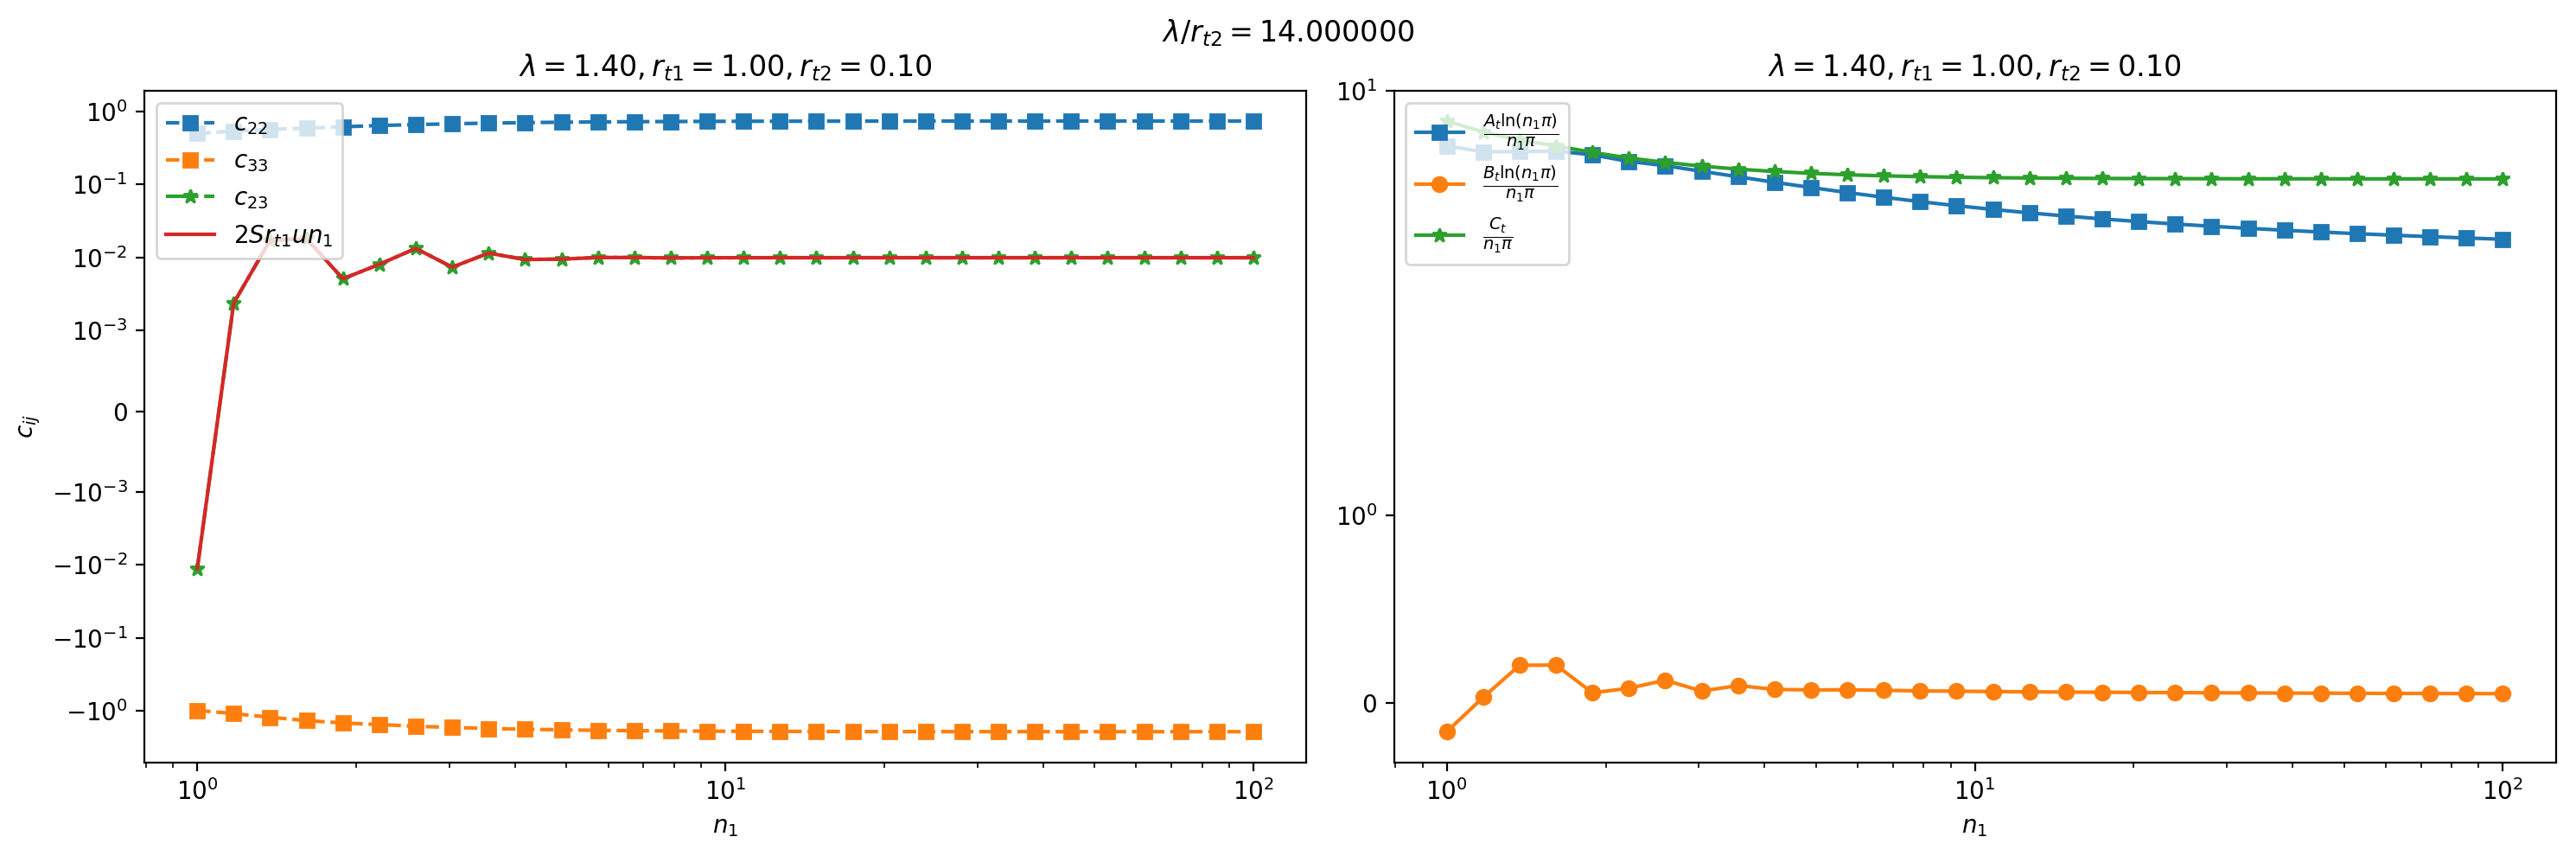

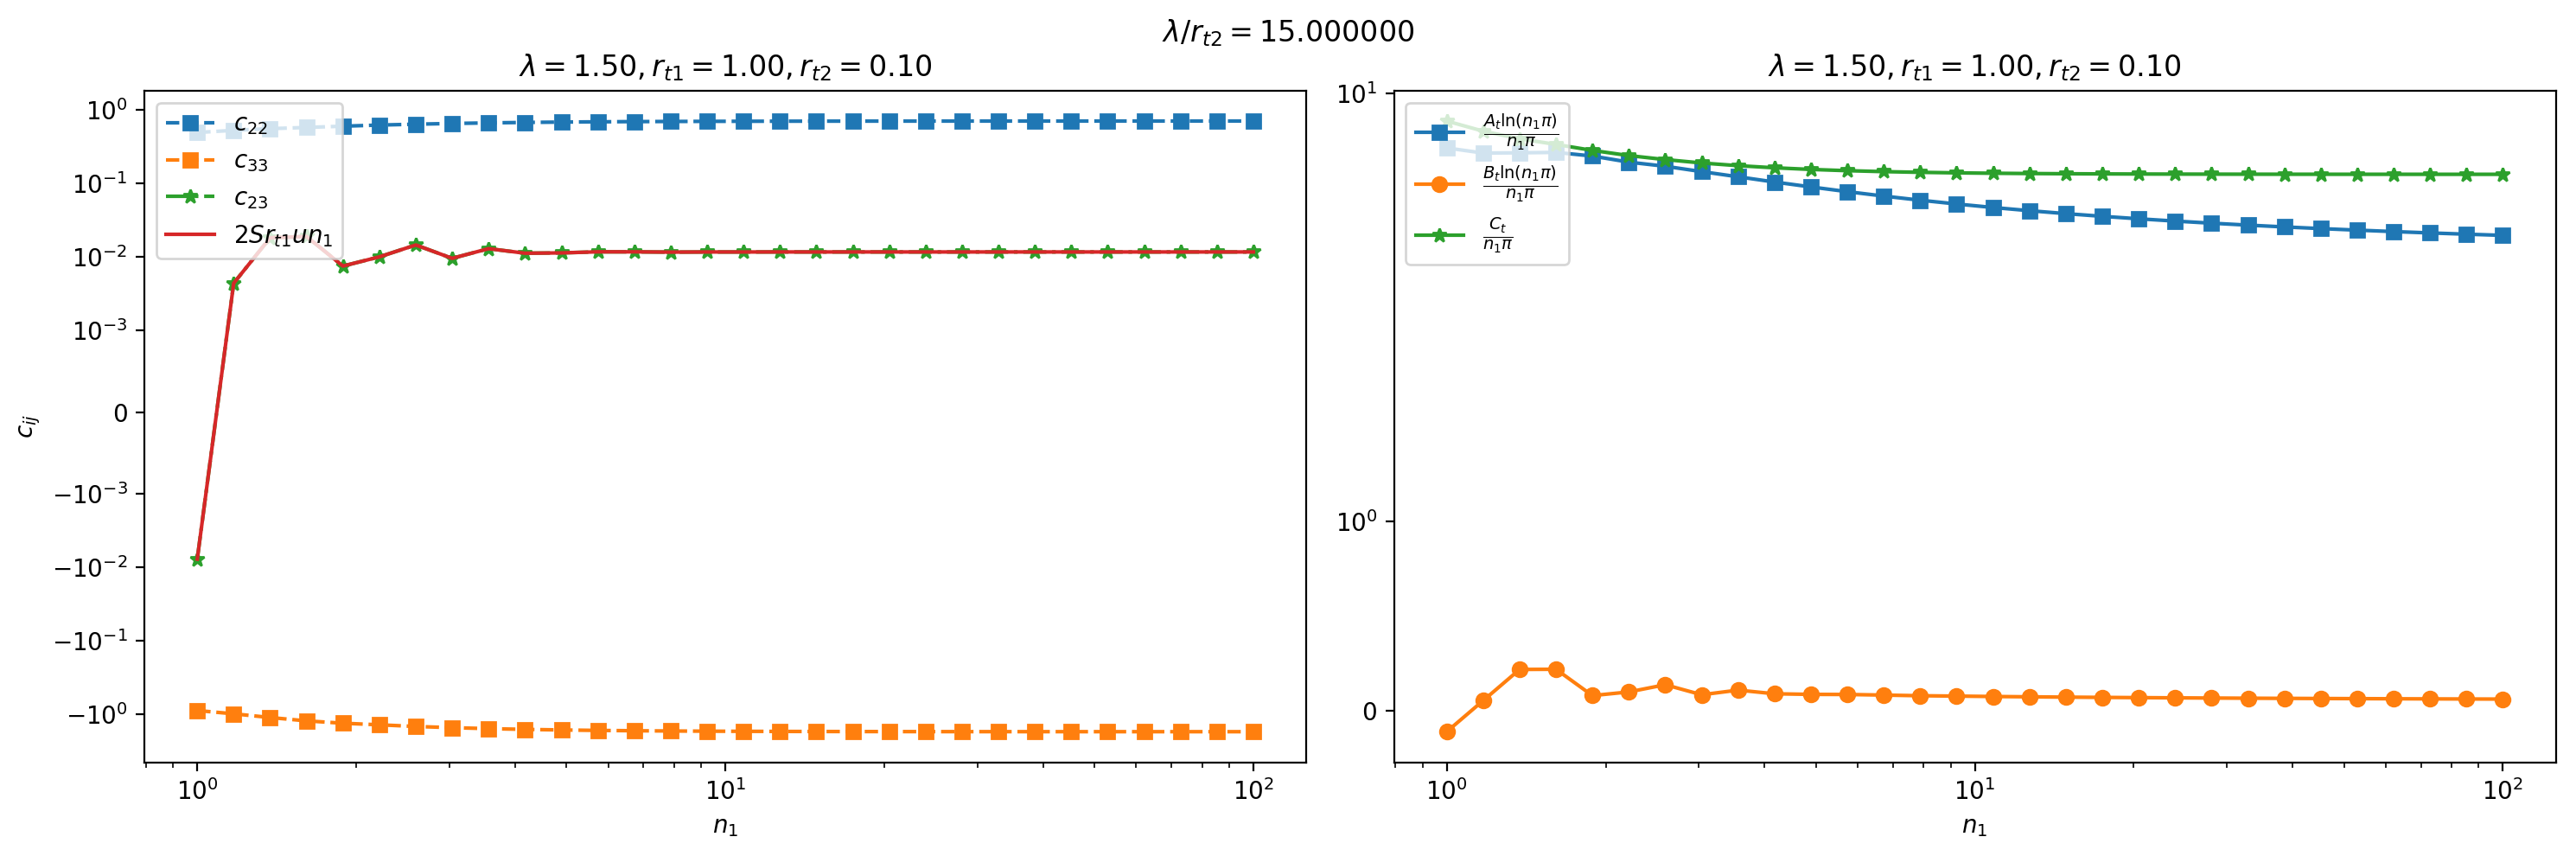

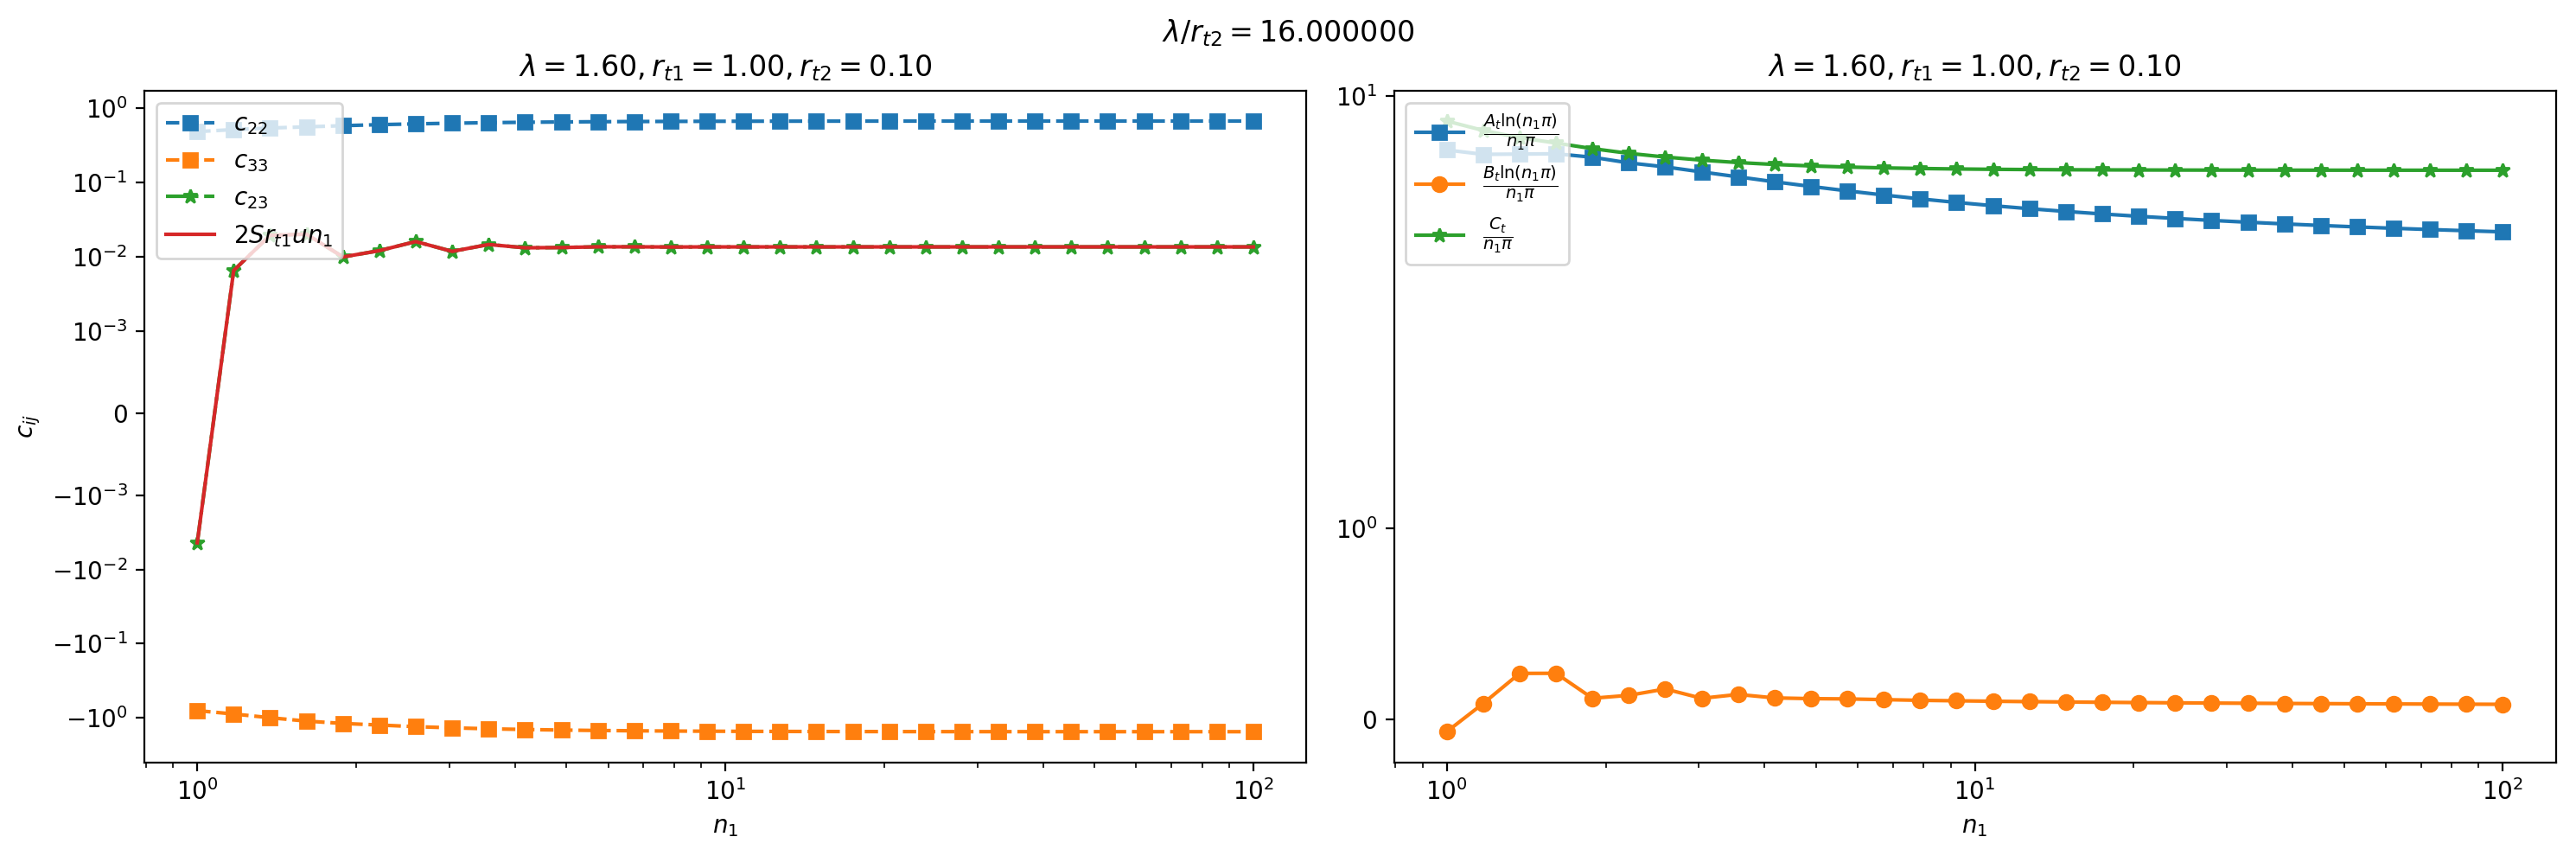

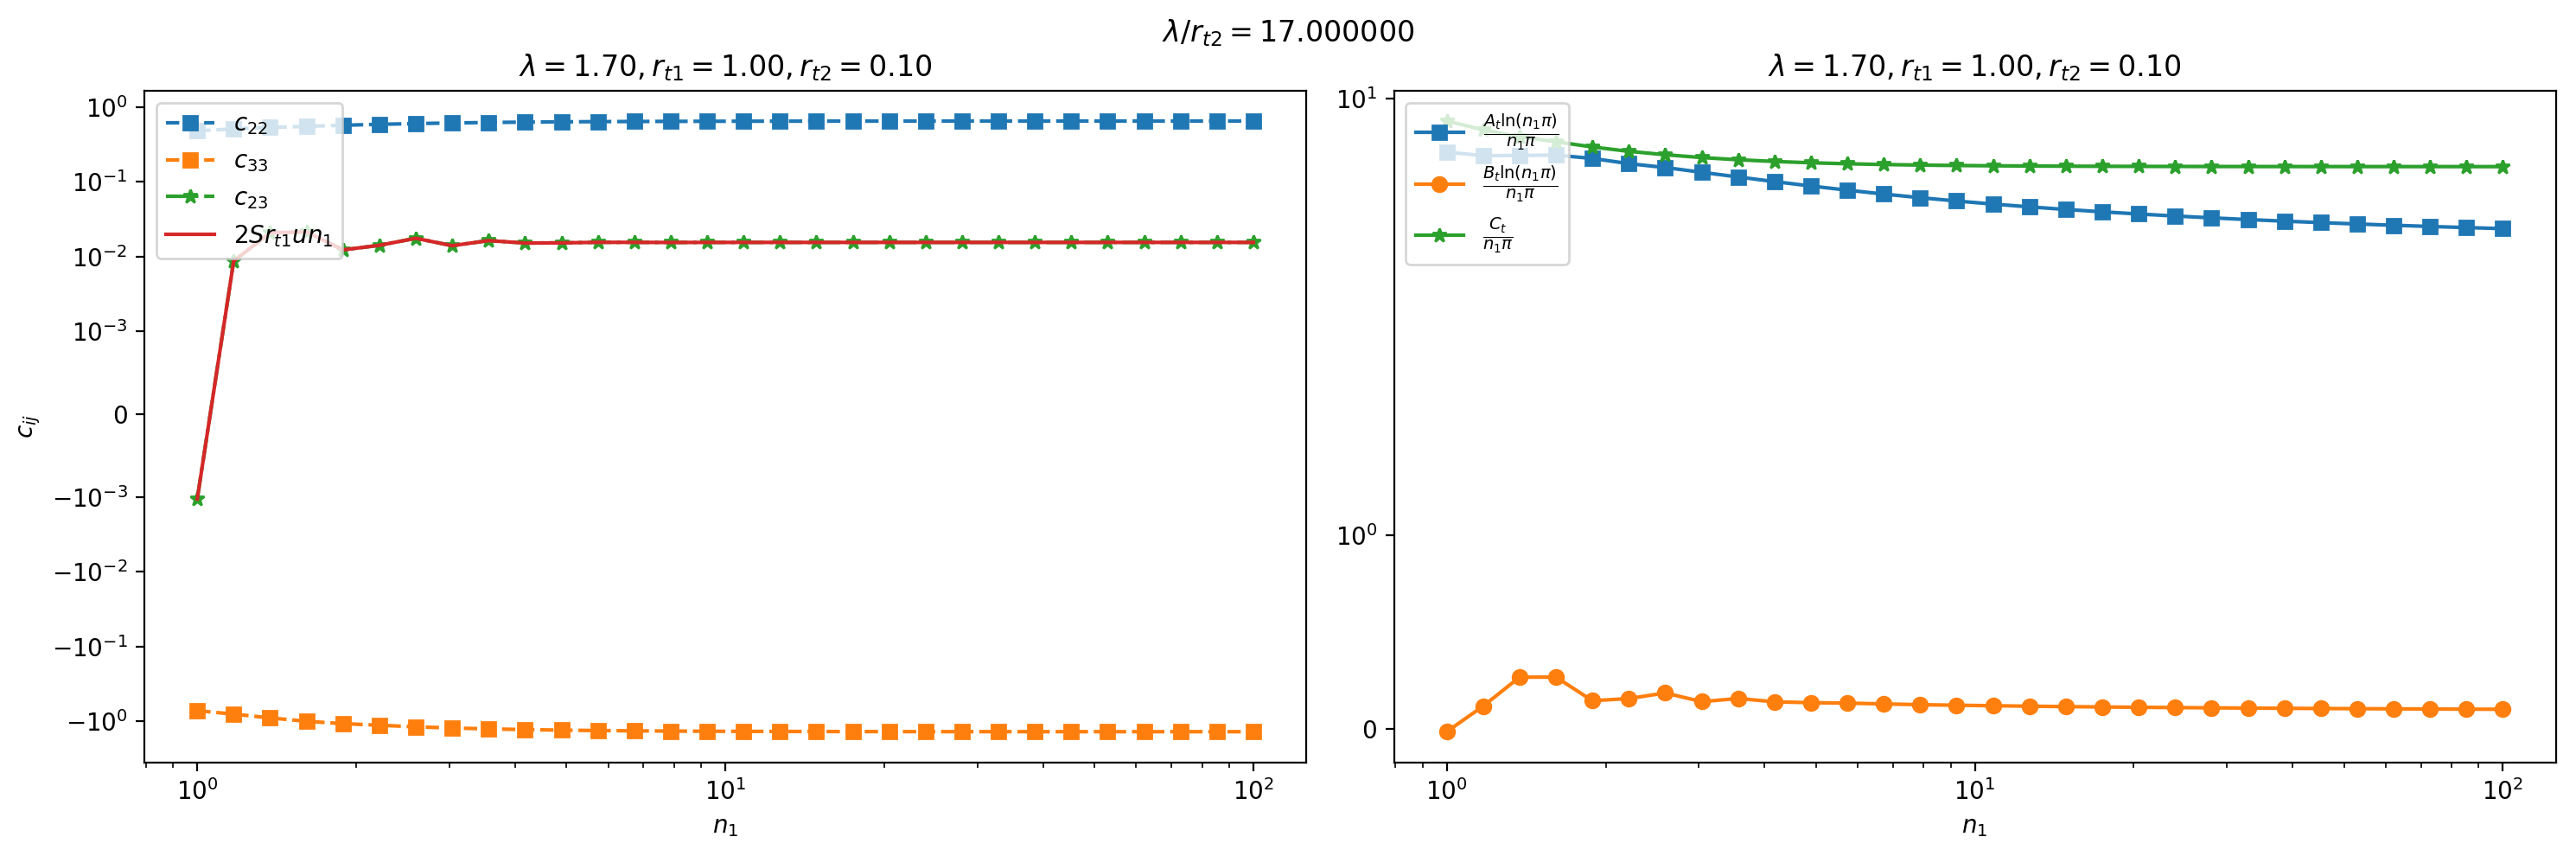

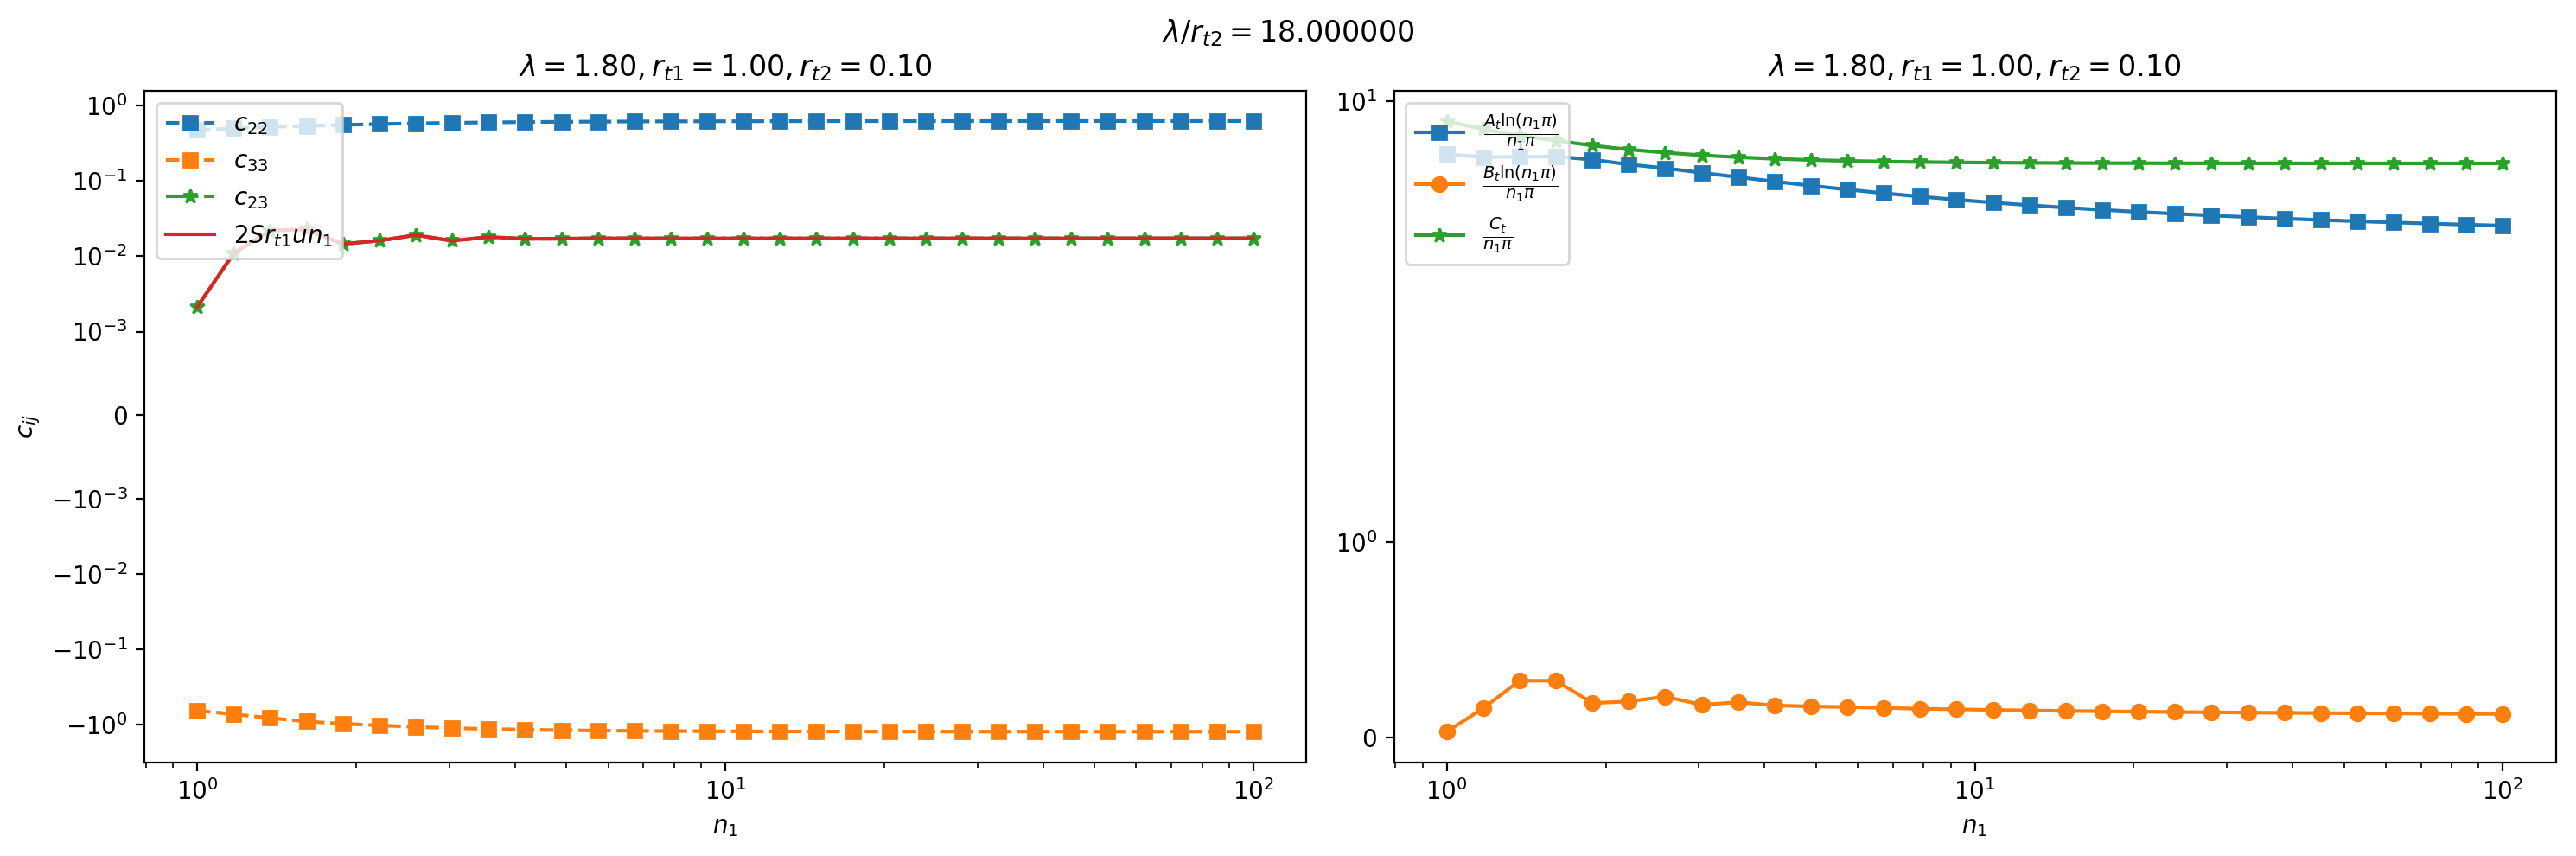

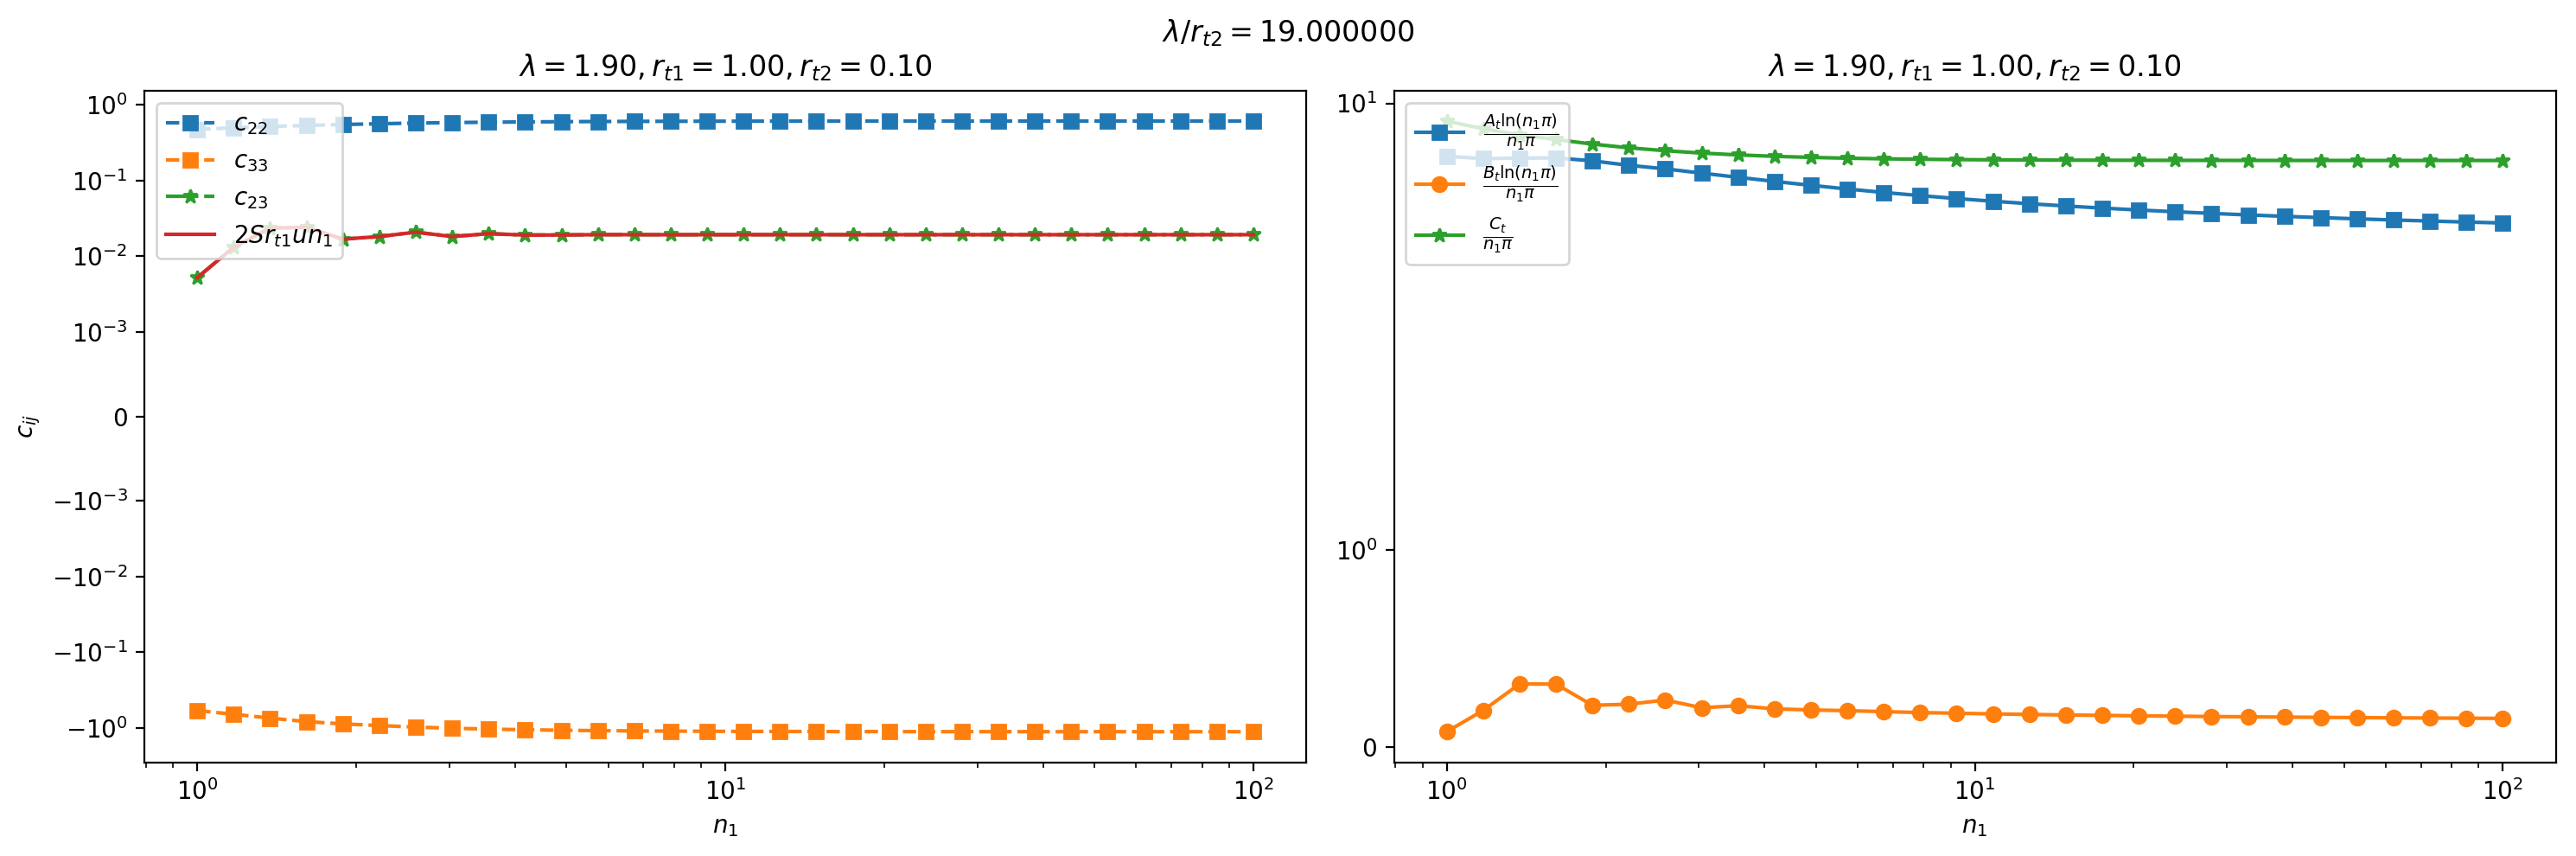

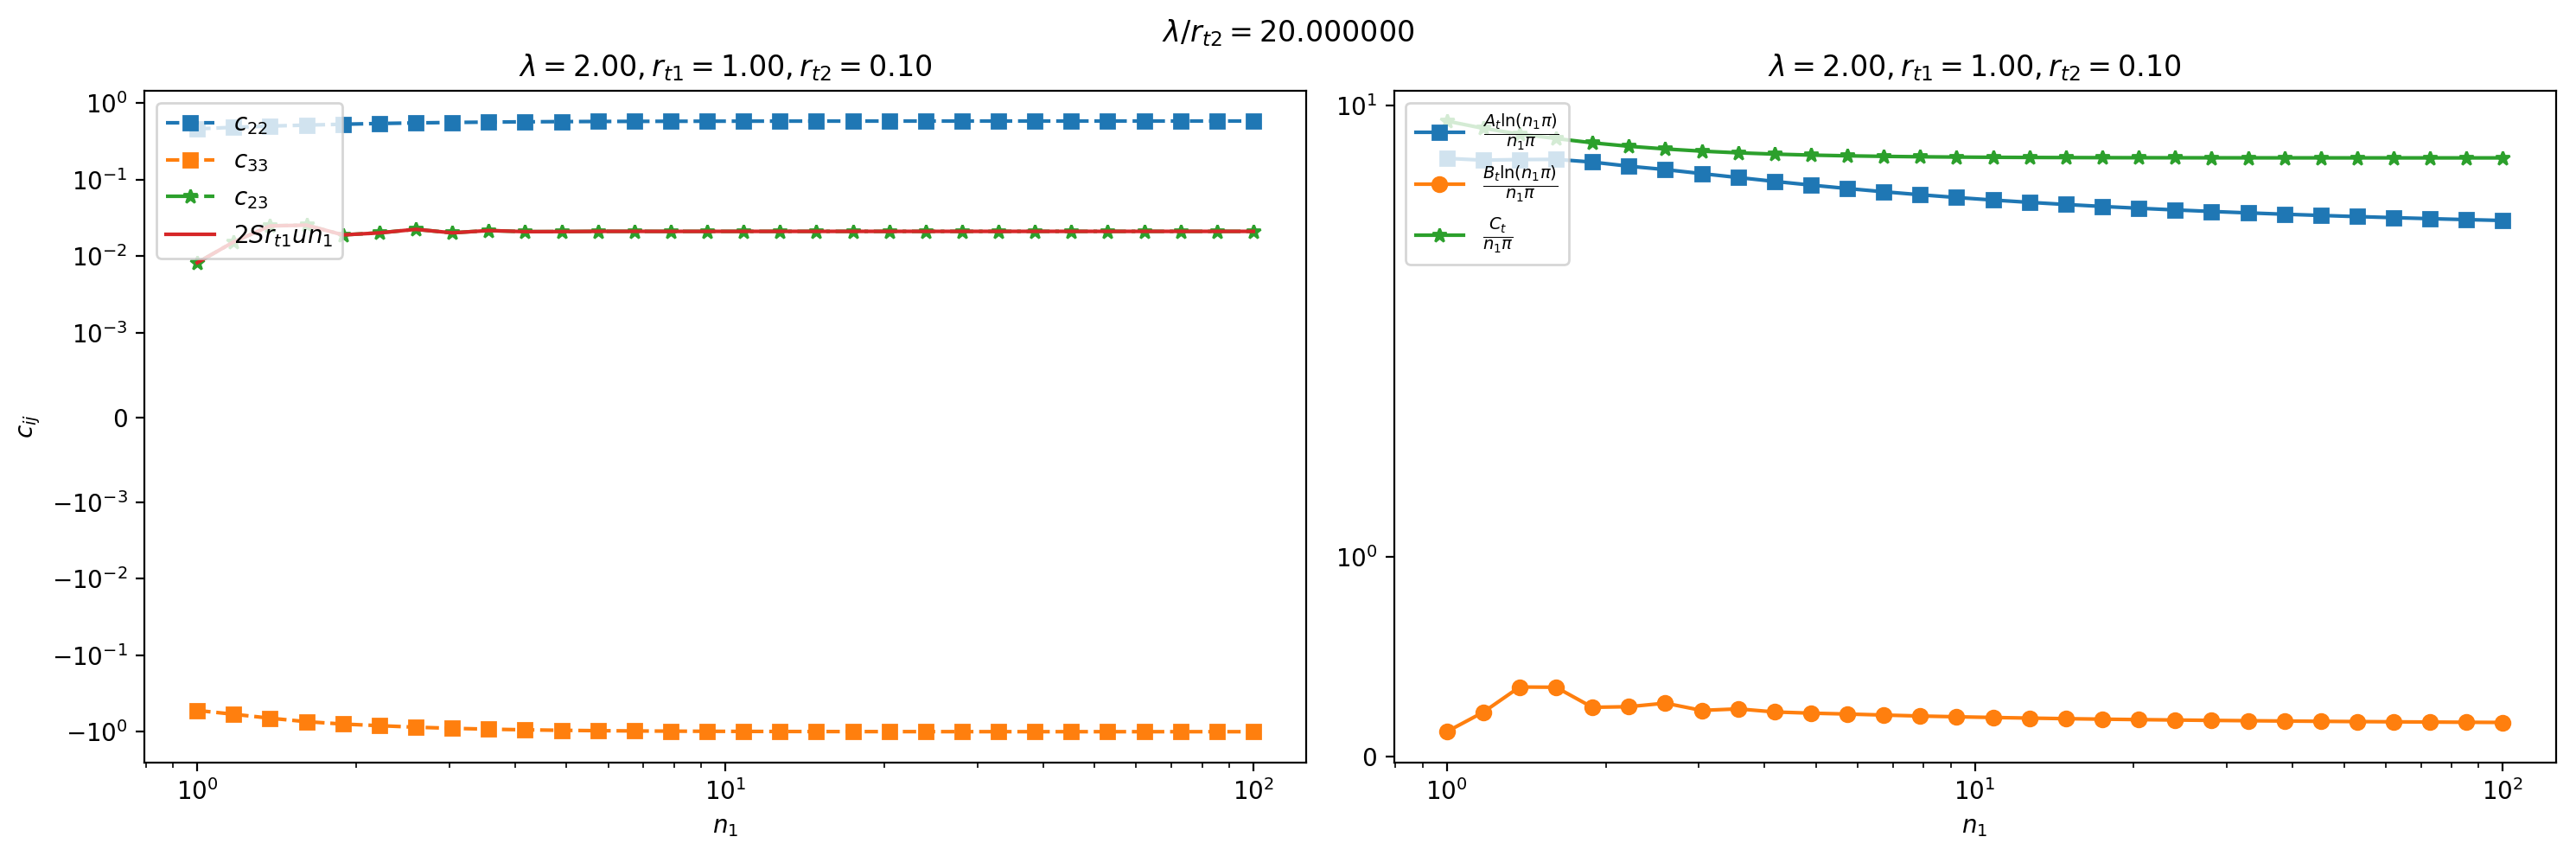

In [6]:
importlib.reload(slb)
importlib.reload(slb)
rt1 = 1
rt2 = 0.1
ch_list = 10 ** np.linspace(0, 2, 30)
epsabs = 1e-100
epsrel = 1e-10
ifprint = False
sij_fun = slb.sij_2hlx_fun
ph_list = np.arange(4, 20.1) * rt2    
ij_list = ((1, 1), (2, 2), (1, 2))
linestyle_list = ['--s', '--s', '-.*'] 
markevery = 1
dpi = 200
figsize=(15, 5)

for ph in ph_list[:]:
    At_list = []
    Bt_list = []
    Ct_list = []
    ftr_list = []
    frt_list = []
    Cij_list = []
    for chi in tqdm_notebook(ch_list):
        tAt, tBt, tCt, tftr, tfrt, tCij = \
            slb.asymtotic_AtBtCtCij_lighthill(ph, rt1, rt2, chi, sij_fun=sij_fun, 
                                              epsabs=epsabs, epsrel=epsrel, ifprint=ifprint)
        At_list.append(tAt)
        Bt_list.append(tBt)
        Ct_list.append(tCt)
        Cij_list.append(tCij)
        ftr_list.append(tftr)
        frt_list.append(tfrt)
    At = np.hstack(At_list)
    Bt = np.hstack(Bt_list)
    Ct = np.hstack(Ct_list)
    Cij = np.dstack(Cij_list)
    uz = Bt / (At * Ct)
    data_asymtotic = [At, Bt, Ct, Cij, ftr_list, frt_list, uz]

    S = np.sqrt(4 * np.pi ** 2 * rt1 ** 2 + ph ** 2)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor('white')
    # Cij
    ax = axs[0]
    for (ti, tj), linestyle in zip(ij_list, linestyle_list):
        ax.plot(ch_list, Cij[ti, tj, :], linestyle, label='$c_{%1d%1d}$' % (ti + 1, tj + 1), markevery=markevery)
    ax.plot(ch_list, 2 * S * rt1 * uz * ch_list, '-', label='$2 S r_{t1} u n_1$', markevery=markevery)
    ax.set_xscale('log')
    ax.set_yscale('symlog', linthreshy=1e-3)
    ax.set_xlabel('$n_1$')
    ax.set_ylabel('$c_{ij}$')
    ax.set_title('$\\lambda=%.2f, r_{t1}=%.2f, r_{t2}=%.2f$' % (ph, rt1, rt2))
    ax.legend(loc='upper left')

    # At, Bt, Ct, uz
    ax = axs[1]
    th_list = np.pi * np.array(ch_list)
    ax.plot(ch_list, At * np.log(th_list) / th_list, '-s', label='$\\frac{A_t \\ln (n_1 \\pi)}{n_1 \\pi}$', markevery=markevery)
#     ax.plot(ch_list, Bt * np.log(ch_list) / ch_list * 1000, '-o', 
#             label='$\\frac{B_t \\ln (n_1)}{n_1} \\times 1000$', markevery=markevery)
    ax.plot(ch_list, Bt * np.log(th_list) / th_list, '-o', label='$\\frac{B_t \\ln (n_1 \\pi)}{n_1 \\pi}$', markevery=markevery)
    ax.plot(ch_list, Ct / th_list, '-*', label='$\\frac{C_t}{n_1 \\pi}$', markevery=markevery)
    ax.set_xscale('log')
    ax.set_yscale('symlog')
    ax.set_xlabel('$n_1$')
    ax.set_title('$\\lambda=%.2f, r_{t1}=%.2f, r_{t2}=%.2f$' % (ph, rt1, rt2))
    ax.legend(loc='upper left')
    fig.suptitle('$\\lambda / r_{t2} = %f$' % (ph / rt2))
    fig.tight_layout(rect=[0, 0, 1, 0.97])

## investigate the component c33

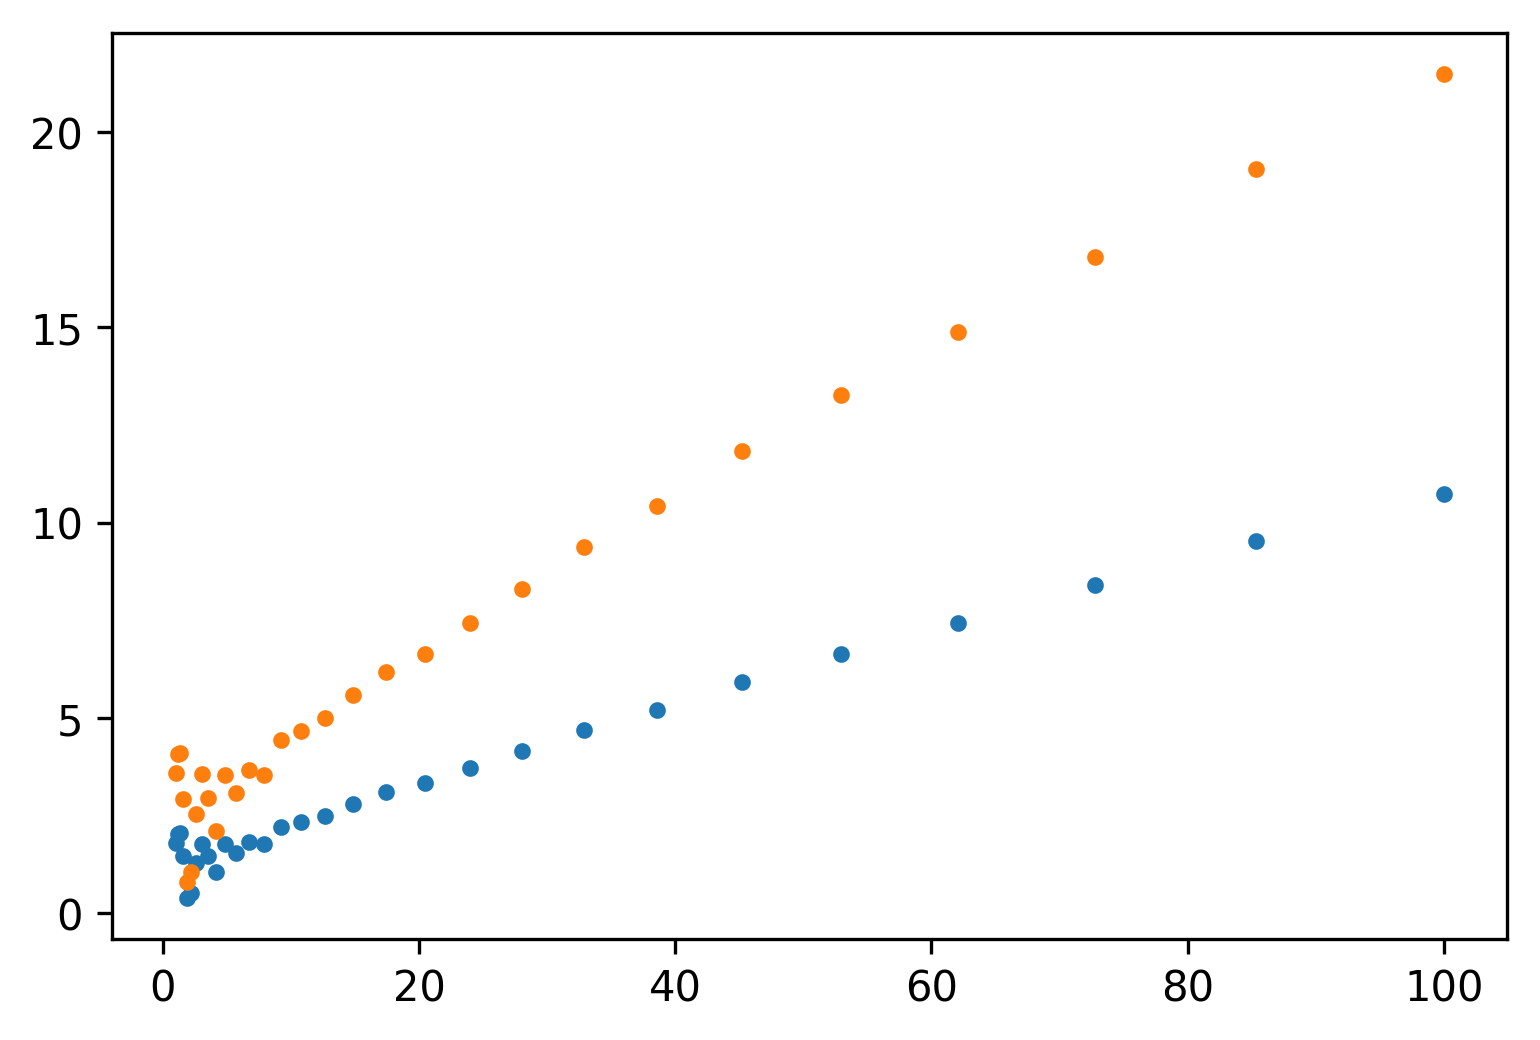

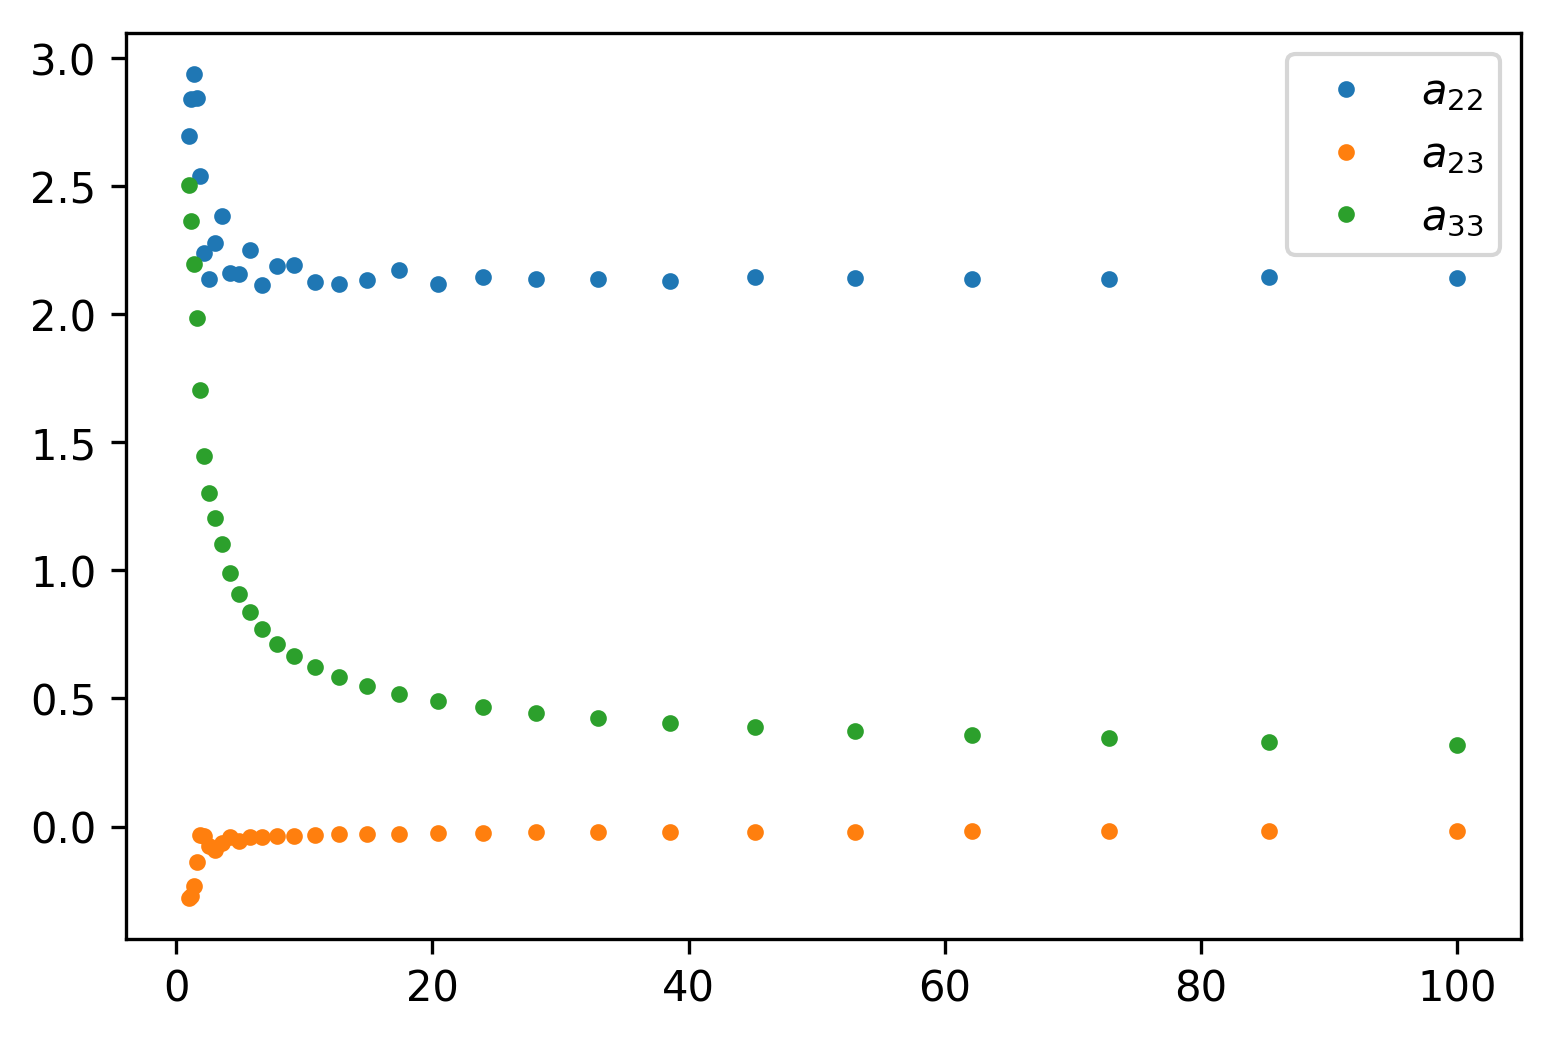

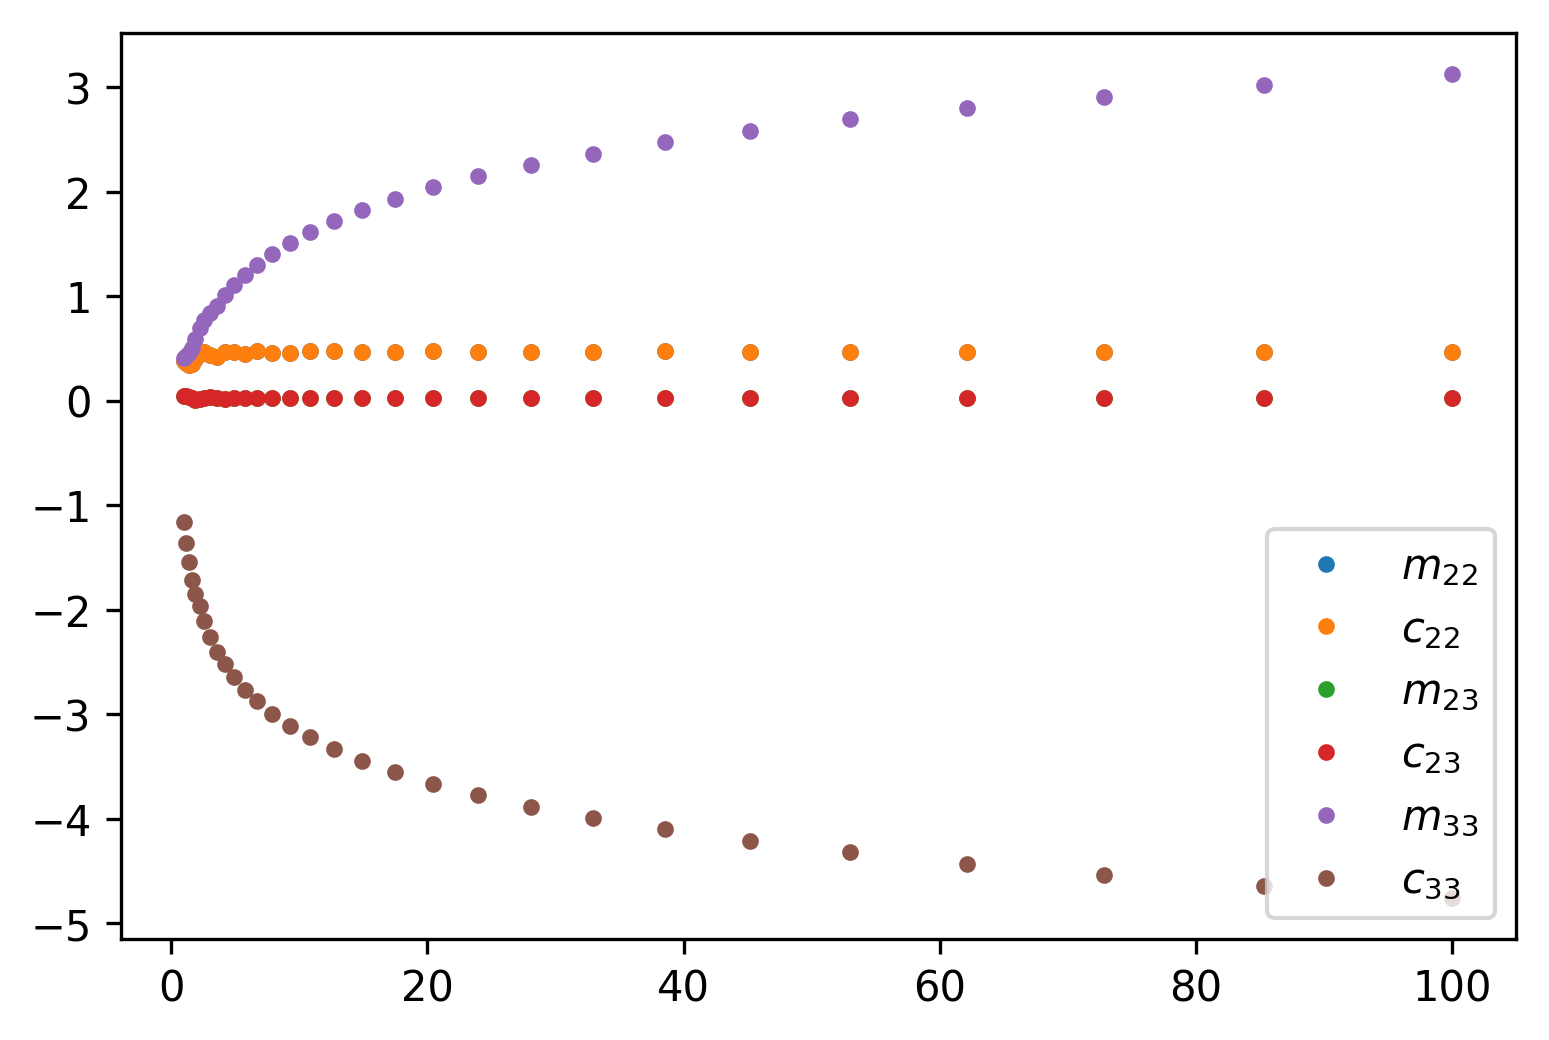

In [55]:
importlib.reload(slb)
ph = 1.5
rt1 = 1
rt2 = 0.1
epsabs = 1e-100
epsrel = 1e-10
sij_fun = slb.sij_1hlx_fun
ch_list = 10 ** np.linspace(0, 2, 30)
t0, t1 = np.array((1, 1, 2)), np.array((1, 2, 2))

# c33_all_list = []
# c33_loc_list = []
# c33_nonloc_list = []
# for chi in ch_list:
#     tc33_all, tc33_loc, tc33_nonloc = slb.dbg_intp_c33(ph, rt1, rt2, chi, sij_fun=sij_fun, epsabs=epsabs, epsrel=epsrel)
#     c33_all_list.append(tc33_all)
#     c33_loc_list.append(tc33_loc)
#     c33_nonloc_list.append(tc33_nonloc)
    
# fig, axi = plt.subplots(ncols=1, nrows=1, dpi=300)
# fig.patch.set_facecolor('white')
# axi,plot(ch_list, c33_all_list, label='c33')
# axi,plot(ch_list, c33_loc_list, label='c33_loc')
# axi,plot(ch_list, c33_nonloc_list, label='c33_nonloc')
# axi.set_yscale('log')
# axi.legend()

S = np.sqrt(4 * np.pi ** 2 * rt1 ** 2 + ph ** 2)
mij_list = []
aij_list = []
At_list = []
Bt_list = []
Ct_list = []
ftr_list = []
frt_list = []
Cij_list = []
for chi in tqdm_notebook(ch_list):
    tMij = slb.asymtoticM_lighthill(ph, rt1, rt2, chi, sij_fun=sij_fun, epsabs=epsabs, epsrel=epsrel)
    mij_list.append(tMij)
    aij_list.append(np.linalg.inv(tMij))
    tAt, tBt, tCt, tftr, tfrt, tCij = slb.asymtotic_AtBtCtCij_lighthill(ph, rt1, rt2, chi, sij_fun=sij_fun,    
                                              epsabs=epsabs, epsrel=epsrel, ifprint=False)
    At_list.append(tAt)
    Bt_list.append(tBt)
    Ct_list.append(tCt)
    Cij_list.append(tCij)
    ftr_list.append(tftr)
    frt_list.append(tfrt)
At = np.hstack(At_list)
Bt = np.hstack(Bt_list)
Ct = np.hstack(Ct_list)
Cij = np.dstack(Cij_list)
uz = Bt / (At * Ct)
mij = np.dstack(mij_list)
aij = np.dstack(aij_list)

# dbg_Bt = [-aij[1, 2, i0] * S * chi * 2 for i0, chi in zip(range(aij.shape[-1]), ch_list)]

# fig, axi = plt.subplots(ncols=1, nrows=1, dpi=300)
# fig.patch.set_facecolor('white')
# axi.plot(ch_list, Bt, '.')
# axi.plot(ch_list, dbg_Bt, '.')

fig, axi = plt.subplots(ncols=1, nrows=1, dpi=300)
fig.patch.set_facecolor('white')
for i0, i1 in zip(t0.ravel(), t1.ravel()):
    axi.plot(ch_list, aij[i0, i1, :], '.', label='$a_{%d%d}$' % (i0 + 1, i1 + 1)) 
axi.legend()

fig, axi = plt.subplots(ncols=1, nrows=1, dpi=300)
fig.patch.set_facecolor('white')
for i0, i1 in zip(t0.ravel(), t1.ravel()):
    axi.plot(ch_list, mij[i0, i1, :], '.', label='$m_{%d%d}$' % (i0 + 1, i1 + 1)) 
    axi.plot(ch_list, Cij[i0, i1, :], '.', label='$c_{%d%d}$' % (i0 + 1, i1 + 1)) 
axi.legend()

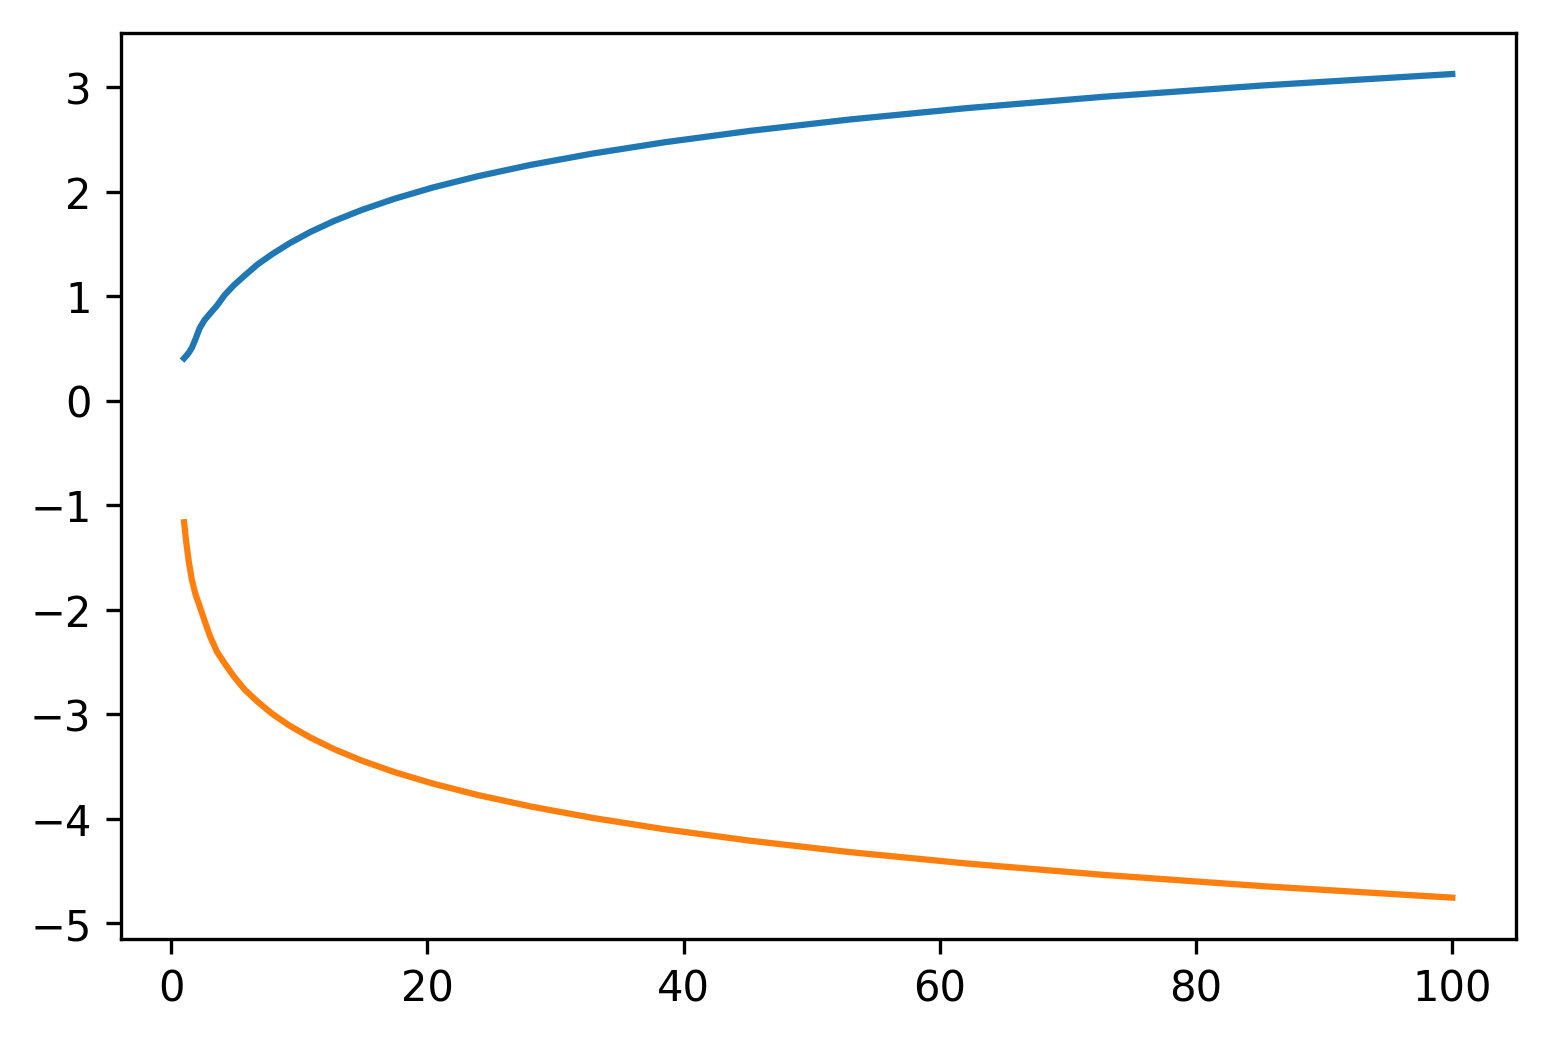

In [61]:
dbg_Bt = [-aij[1, 2, i0] * S * chi * 2 for i0, chi in zip(range(aij.shape[-1]), ch_list)]
dbg_Bt1 = [chi for i0, chi in zip(range(aij.shape[-1]), ch_list)]
dbg_Bt2 = [-aij[1, 2, i0] for i0, chi in zip(range(aij.shape[-1]), ch_list)]

fig, axi = plt.subplots(ncols=1, nrows=1, dpi=300)
fig.patch.set_facecolor('white')
# axi.plot(ch_list, dbg_Bt, '.')
# axi.plot(ch_list, dbg_Bt1, '.')
# axi.plot(ch_list, dbg_Bt2, '.')
axi.plot(ch_list, mij[2, 2, :])
axi.plot(ch_list, Cij[2, 2, :])
# t1 = (Cij[1, 2, :] ** 2 - Cij[1, 1, :] * Cij[2, 2, :]) * ph * np.pi - Cij[1, 1, :] * S * np.log(ch_list * np.pi)
# axi.plot(ch_list, t1)


# Old version

1.000000e+00 0.92902597334 1.03142602608e-14
1.000000e+01 7.44285115496 3.36512309882e-09
1.000000e+02 23.365325977 3.12685091397e-07
1.000000e+03

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


 38.1423463763 4.24355192959e-07
1.000000e+04 52.6415808434 0.000497919861434
6.283185e+03 (49.71964107895853, 0.004235886296271426)
6.283185e+03 (-3.312704035261106, 4.861951951728252e-08)


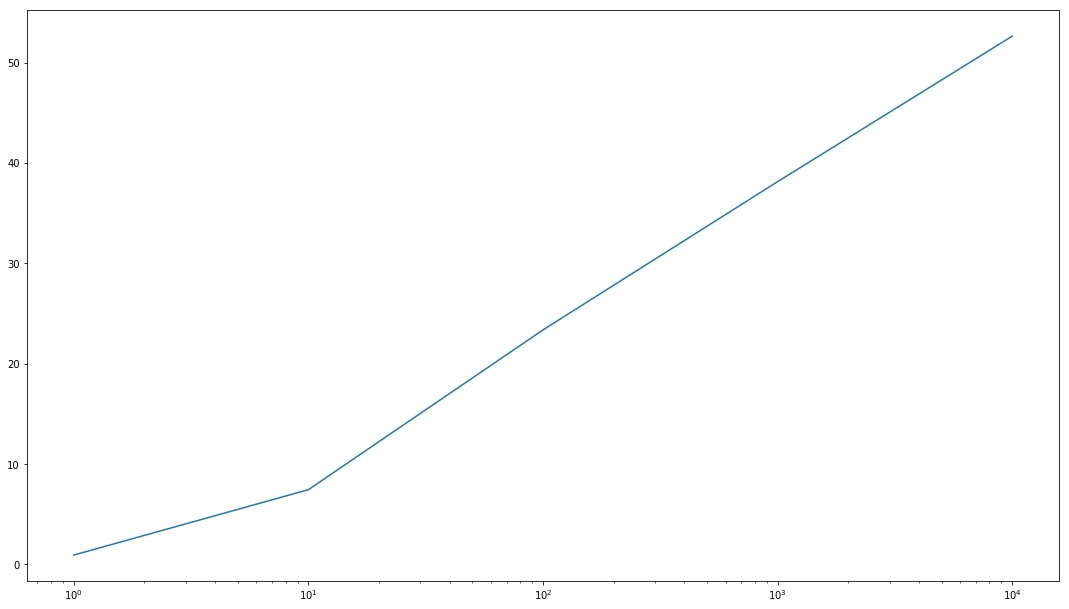

In [116]:
ph = 1
phi = 1
x1 = 1
x2 = 1
x3 = 1
r = 1
rho = 0.2
maxtheta = 100000

dx1 = lambda theta: -x1 + np.cos(theta)*(r - rho*np.sin(phi)) + (ph*rho*np.cos(phi)*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
dx2 = lambda theta: -x2 - (ph*rho*np.cos(phi)*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2) + (r - rho*np.sin(phi))*np.sin(theta)
dx3 = lambda theta: (ph*theta)/(2.*np.pi) - x3 + (2*np.pi*r*rho*np.cos(phi))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
ds = lambda theta: np.sqrt(dx1(theta)**2 + dx2(theta)**2 + dx3(theta)**2)
invds = lambda theta: 1 / ds(theta)
invds2 = lambda theta: (dx1(theta) * dx3(theta)) / ds(theta) ** 3
n_int = np.int(np.log10(np.float64(maxtheta)))
int_upp = 10**np.arange(np.float64(n_int))
int_invr = np.zeros(n_int)
int_err = np.zeros(n_int)
for i0, tint_upp in enumerate(int_upp):
    int_invr[i0], int_err[i0] = integrate.quad(invds, 0, tint_upp, limit=500000, maxp1=500000, limlst=500000)
    print('%e' % tint_upp, int_invr[i0], int_err[i0])
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.patch.set_facecolor('white')
ax.semilogx(int_upp, int_invr)
int_upp = 1000*2*np.pi
print('%e' % int_upp, integrate.quad(invds, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))
print('%e' % int_upp, integrate.quad(invds2, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))


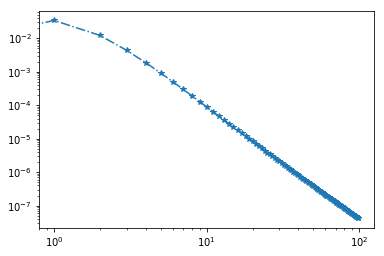

In [12]:
# integrate 1/r over one period
ph = 1
phi = 1
x1 = 0
x2 = 0
x3 = 0
r = 1
rho = 0.2
jth_list = np.arange(100)  # the jth period, means theta ranging from jth*2pi to (jth+1)*2pi

dx1 = lambda theta: -x1 + np.cos(theta)*(r - rho*np.sin(phi)) + (ph*rho*np.cos(phi)*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
dx2 = lambda theta: -x2 - (ph*rho*np.cos(phi)*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2) + (r - rho*np.sin(phi))*np.sin(theta)
dx3 = lambda theta: (ph*theta)/(2.*np.pi) - x3 + (2*np.pi*r*rho*np.cos(phi))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
ds = lambda theta: np.sqrt(dx1(theta)**2 + dx2(theta)**2 + dx3(theta)**2)
invds = lambda theta: 1 / ds(theta)
invds2 = lambda theta: (dx1(theta) * dx3(theta)) / ds(theta) ** 3

int_invr = np.zeros(jth_list.shape)
int_err = np.zeros(jth_list.shape)
for i0, jth in enumerate(jth_list):
    int_invr[i0], int_err[i0] = integrate.quad(invds2, jth*2*pi, (jth+1)*2*pi, limit=500000, maxp1=500000, limlst=500000)
#     print('%d' % jth, int_invr[i0], int_err[i0])
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.patch.set_facecolor('white')
ax.loglog(jth_list, int_invr, '*-.')


In [3]:
int_invr

array([4, 4, 2])

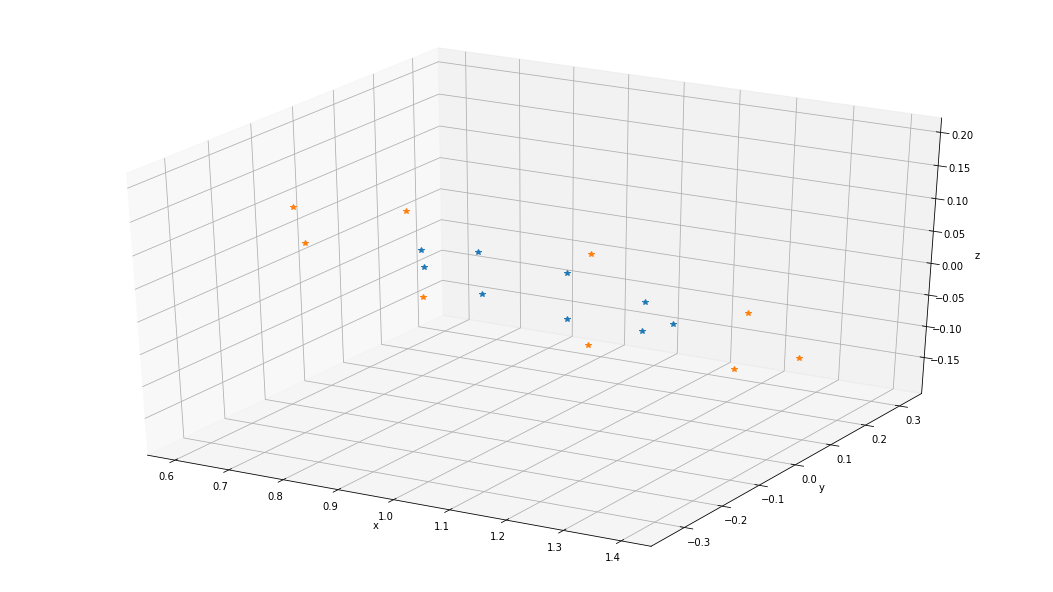

In [95]:
ph = 10   # helix pitch
r = 1    # helix radius
frho = 0.2    # helix minor radius for force nodes 
urho = 0.4    # helix minor radius for velocity nodes
n_node = 9    # number of nodes
theta = 0    # location of node plane

# rotation matrix x_global = R3*x_local
R3 = np.array((((-2*np.pi*r*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),(ph*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-np.cos(theta)),((2*np.pi*r*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-((ph*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)),-np.sin(theta)),(ph/np.sqrt(ph**2 + 4*np.pi**2*r**2),(2*np.pi*r)/np.sqrt(ph**2 + 4*np.pi**2*r**2),0)))
phi = np.linspace(0, 2*np.pi, n_node, endpoint=False)
helix_center = np.array((r*np.cos(theta), r*np.sin(theta), ph/(2*np.pi)*theta)).reshape((-1, 1))
fnodes = np.zeros((3, n_node))
fnodes[1] = frho * np.cos(phi)
fnodes[2] = frho * np.sin(phi)
fnodes = np.dot(R3, fnodes) + helix_center
unodes = np.zeros((3, n_node))
unodes[1] = urho * np.cos(phi)
unodes[2] = urho * np.sin(phi)
unodes = np.dot(R3, unodes) + helix_center

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')
ax.plot(*fnodes, '*')
ax.plot(*unodes, '*')
# ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
def InfHelixGreenFun():
    # fnodes, unodes: node coordinates of force and velocity, without check, make sure correct. 
    # frho, urho, minor radius of helix, 
    # r, major radius of helix; ph, helix pitch, 
    # maxtheta, upper limit of integration. 
    
    phi = 1
    maxtheta = 100000
    